# BigMart Sales Prediction Using Python, Scikit-Learn, and Linear Regression
### Name: Sujan Neupane
### Group: 2
### UNI ID: 2058939

## The Problem Statement

<b> In this Project, I will be implementing Linear Regression with Python and Scikit-Learn to predict the sales prices of different items in BigMart. I have used a [BigMart Sales Dataset](https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data) that consists of multiple features and one target ` `Item_Outlet_Sales`. </b>

## Dataset Description

In this project, I will use a dataset containing many features like `Item_Identifier,	Item_Weight,	Item_Fat_Content,	Item_Visibility,	Item_Type	, Item_MRP	,Outlet_Identifier	,Outlet_Establishment_Year	,Outlet_Size	, Outlet_Location_Type	and Outlet_Type` to predict the target that is `Item_Outlet_Sales`.	

This is a `Regression` problem because our target column contains continuous values. Therefore, We will first perform exploratory data analysis and visualization, preprocessing and feature engineering and finally use our `Linear Regression` model from `Sklearn` to make predictions for our target column. 

I will also use different loss metrics to analyze the loss function for our linear regression model. I will also perform `Hyperparameter Tuning` to further improve our model. At the end, I will additionally perform `Feature Engineering` to select useful features to further improve the performance of our model. 

The link to the dataset is given as follows:

https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data

## Importing the Dependencies

The dataset I have used is taken from `Kaggle`. I have used `opendatasets` library to download the dataset directly from kaggle. Since this library is a third party library and not present on google collab, I have manually installed it using pip command.

In [1]:
# Installing our third party library that eases the way we download datasets from kaggle
!pip install opendatasets --quiet

In [2]:
# lets import the data visualization tools and libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# the following are different visualization settings applied for our plots and graphs
sns.set_style('darkgrid')
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['figure.facecolor'] = '#00000000'

In [3]:
# Importing our core dependencies

import opendatasets as od                            # opendatasets is used to download dataset directly from kaggle
import pandas as pd                                  # Pandas is used for data manipulation
import os                                            # This will simply be used to check the list of files in a given directory
import numpy as np                                   # This will mainly be used for data cleaning and preprocessing
from sklearn.preprocessing import LabelEncoder       # This will be used for encoding categorical columns
from sklearn.linear_model import LinearRegression    # We will be using Linear Regression model from scikit-learn library to make predictions
from sklearn.metrics import mean_squared_error       # This is one of the metrics to evaluate loss/cost function of our model
from sklearn.metrics import mean_absolute_error      # This is one of the metrics to evaluate loss/cost function of our model
from sklearn.metrics import r2_score                 # This is one of the metrics to evaluate loss/cost function of our model
from sklearn.preprocessing import StandardScaler     # This class will be used to scale the features in the preprocessing step
from sklearn.model_selection import train_test_split # This class will be used to randomly split our data into training, valdiation and testing set

## Downloading the Data From Kaggle

In [788]:
# The link to our kaggle dataset
url = 'https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data'

# download method from opendatasets takes in url as a non keyword argument and downloads the respective data from kaggle
od.download(url)

Skipping, found downloaded files in "./bigmart-sales-data" (use force=True to force download)


In [789]:
# this command returns the list of files present in the given directory
os.listdir('bigmart-sales-data')

['Train.csv', 'Test.csv']

In [790]:
# Using pandas to load Train.csv file into a pandas dataframe
df = pd.read_csv('bigmart-sales-data/Train.csv');df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## 1. Data Understanding

### 1.1 Data Characteristics

In [791]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [792]:
# dataframe.head() method offered by pandas displays first 5 rows of the respective dataframe

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Here, dataframe.head() method simply returns the first five rows of a respective dataframe.

In [793]:
df.size

102276

Here, df.size returns the total number of elements present in the dataframe. i.e number of columns * number of rows. This is further proven in the cell below.

In [794]:
8523 * 12   # 8523 is the number of rows in the dataframe and 12 is the number of columns

102276

In [795]:
# dataframe

df.shape

(8523, 12)

we can clearly see that there are 8523 rows in our training set and 12 columns respectively.

In [796]:
# lets check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


We can clearly see that there are a total of 8523 rows in our training dataframe. However, some columns like Item_Weight have less than the total entries. This means that some of the columns in our training dataframe have `Null`values. Furthermore, there are multiple columns containing categorical as well as numerical data.

<b> Checking the number of null values in training dataframe </b>

In [797]:
''' here isnull() method return a boolean value if a certain value in a pandas dataframe is null. 
Furthermore, sum() methods calculates the number of True in every columns'''

df.isnull().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can clearly see that columns Item_Weight and Outlet_Size have significant number of null values. We will later decide to either drop the entire column or impute null values in the data cleaning step.

In [798]:
# lets check how much percentage of values in each columns are Null

(df.isnull().sum() / df.shape[0]) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

Similarly, we can see that approximately 17 % and 28.3 % of values in the columns Item_Weight and Outlet_Size have null values respectively.

From the above data inspection steps, we can clearly see that the percentage of null values of columns `Outlet_Size` and `Item_Weight` is approximately the same for both training and testing dataframes respectively.

In [799]:
# finding the columns in our training dataframe
all_columns = list(df.columns);all_columns

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

<b> Finding the Categorical and Numerical columns in Training Set </b>

In [800]:
# finding the categorical columns 
categorical_cols = df.select_dtypes(include = 'object').columns.to_list()
print("The total number of categorical_cols is: ", len(categorical_cols))
print("And, they are: ")
print(categorical_cols)

The total number of categorical_cols is:  7
And, they are: 
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [801]:
# finding the numerical columns
numerical_cols = df.select_dtypes(include = 'number').columns.to_list();numerical_cols
print("The total number of numerical_cols is: ", len(numerical_cols))
print("And, they are: ")
print(numerical_cols)

The total number of numerical_cols is:  5
And, they are: 
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [802]:
# checking if there is any duplicate data in the dataframe
df.duplicated().sum()

0

In [803]:
# generates descriptive statistics for corresponding columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


The dataframe.describe() methods generate descriptive statistics for the corresponding columns in the respective dataframe.

Here, Descriptive statistics are simply used to summarize a dataset. They include mean, median, minimum, maximum, first quartile, third quartile etc.
They exclude Null or NaN values. This method generates the descriptive statistics for the numerical features of the corresponding dataframe.

In [804]:
df[categorical_cols]  # dataframe only containing categorical columns

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


<b> Exploring Item_Identifier column </b>

In [805]:
# series.unique return an array containing unique values in the series 
len(df['Item_Identifier'].unique().tolist())

1559

The column Item_Identifier has 1559 unique values. The values in this column seem to store a special code for different types of food. We can see that the first two characters of the string data in this column refer to the type of food. For example. FD most likely refers to food, NC refers to non consumable. Similarly, DR most likely refers to drinks. We will perform preprocessing for this column in the step of data cleaning later.

<b> Exploring Item_Fat_Content column </b>

In [806]:
# dataframe.unique/ series.unique return a Series containing counts of unique rows in the DataFrame or series
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

<b> Exploriing Item_Type column </b>

In [807]:
# dataframe.unique/ series.unique return a Series containing counts of unique rows in the DataFrame or series
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

The column Item_Type contains many unique values. Among them, the value Fruits and Vegetables have appeared the most. Similarly, the value Seafood have appeared the least. I will also visualize this using a barplot later in the data visualization step.

This column also seems to have redundant data. The value `Low Fat` and `LF` seem to be the same type of value. This also applies to another unique value present in the column `low fat`. Furthermore, the unique values `reg` and `Regular` also seem to be the same values. This column will also undergo preprocessing in our data cleaning step.

<b> Exploring Outlet_Identifier column </b>

In [808]:
# series.unique return an array containing unique values in the series 
len(df['Outlet_Identifier'].unique())

10

In [809]:
# dataframe.unique/ series.unique return a Series containing counts of unique rows in the DataFrame or series
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

The column Outlet_Identifier has almost identical number of 10 unique values.

<b> Exploring Outlet_Size column</b>

In [810]:
# dataframe.unique/ series.unique return a Series containing counts of unique rows in the DataFrame or series
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

The column Outlet_Size has 3 unique values. Values Medium and Small have appeared almost thrice as many as the value High.

<b> Exploring Outlet_Type column </b>

In [811]:
# dataframe.unique/ series.unique return a Series containing counts of unique rows in the DataFrame or series
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

This column has 4 unique values. More than 60 % of the values in this column are of supermarket type1 type.

<b> Summarizing the data characteristics </b>
```
  1. There are 8523 rows and 12 columns in our original dataframe.

  2. The two columns, Item_Weight and Outlet_Size, have 1463 and 2410 Null values.

  3. The remaining columns donot have Null Values.

  4. There are no duplicate rows in our dataframe.

  5. There are 7 categorical columns and 5 numerical columns in our dataframe.

  6. The columns in the dataframe are Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type , Item_MRP ,Outlet_Identifier ,
  Outlet_Establishment_Year ,Outlet_Size , Outlet_Location_Type, Outlet_Type, and Item_Outlet_Sales respectively.

```

### 1.2 Tabular Representation of Data Characteristics

In [812]:
# the descriptions for the corresponding columns have been used as given on kaggle.
# the descriptions for corresponding columns are not generated by me

description = [
               'Unique product ID',
               'Weight of product',
               'Whether the product is low fat or not',
               'The % of total display area of all products in a store allocated to the particular product',
               'The category to which the product belongs',
               'Maximum Retail Price (list price) of the product',
               'Unique store ID',
               'The year in which store was established',
               'The size of the store in terms of ground area covered',
               'The type of city in which the store is located',
               'Whether the outlet is just a grocery store or some sort of supermarket',
               'Sales of the product in the particular store'
]

In [813]:
# the data types for the corresponding columns
corresponding_dtypes = ['object','float64','object','float64','object','float64','object','int64','object','object','object','float64']

In [814]:
tabular_data = pd.DataFrame({
    'S.N':[i for i in range(1,13)],
    'Columns':df.columns.to_list(),
    'Description':[description[i-1] for i in range(1,13)],
    'Nullable':['non-null' for i in range(1,13)],
    'Data Type':[corresponding_dtypes[i-1] for i in range(1,13)]
});tabular_data

,S.N,Columns,Description,Nullable,Data Type
0,1,Item_Identifier,Unique product ID,non-null,object
1,2,Item_Weight,Weight of product,non-null,float64
2,3,Item_Fat_Content,Whether the product is low fat or not,non-null,object
3,4,Item_Visibility,The % of total display area of all products in...,non-null,float64
4,5,Item_Type,The category to which the product belongs,non-null,object
5,6,Item_MRP,Maximum Retail Price (list price) of the product,non-null,float64
6,7,Outlet_Identifier,Unique store ID,non-null,object
7,8,Outlet_Establishment_Year,The year in which store was established,non-null,int64
8,9,Outlet_Size,The size of the store in terms of ground area ...,non-null,object
9,10,Outlet_Location_Type,The type of city in which the store is located,non-null,object


In [815]:
# we can also view the characteristics of columns using dataframe.info() method offered by pandas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The dataframe.info() method simply prints our the information about a DataFrame including the index, dtype and the names of all columns, non-null count, memory usage etc.

## 2. Data Analysis

I will make use of matplotlib and seaborn libraries to plot bargraphs, histograms, boxplots, scatterplots, etc to visualize and analyze the data.

I will perform univariate, bivariate as well as multivariate analysis.

In [816]:
# printing the categorical columns
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [817]:
# printing the numerical columns
numerical_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

<b>For Item_Fat_Content Column </b>

In [818]:
# dataframe..value_counts()/ series..value_counts() return a Series containing counts of unique rows in the DataFrame or series
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

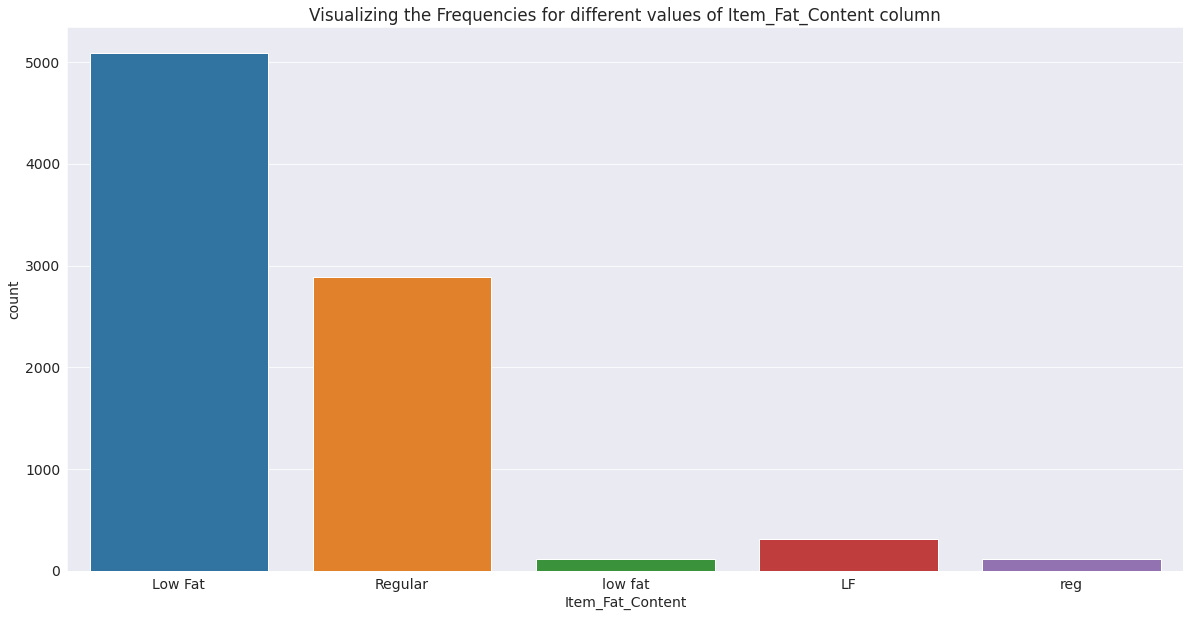

In [819]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars
sns.countplot(x = 'Item_Fat_Content', data = df).set(title = 'Visualizing the Frequencies for different values of Item_Fat_Content column');

Hence, We can conclude that the items that are most bought are of Low Fat type. There also seems to be inconsistency in data for this column. It looks like the categorical variables Low Fat, low fat, and LF are the same. Similarly. the categorical variables Regular and reg seem to be the same. This column will undergo preprocessing in our data cleaning step where I will replace these variable into unique categorical variables.

<b> For Outlet_Establishment_Year Column </b>

In [820]:
# series.unique return an array containing unique values in the series 
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

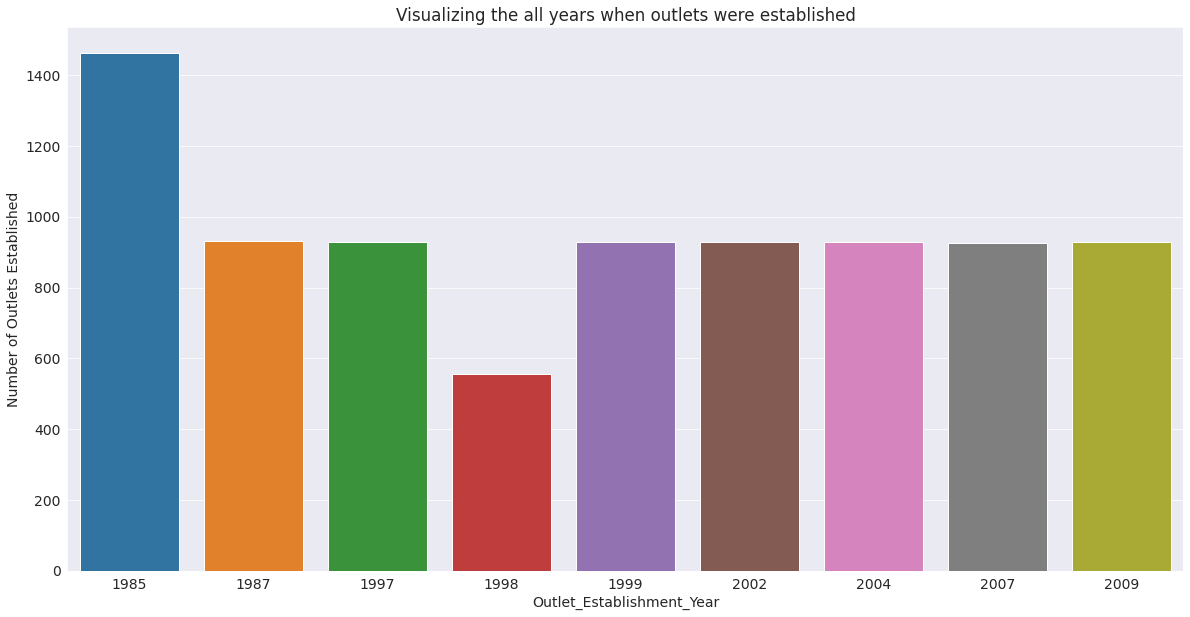

In [821]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars

sns.countplot(x = df['Outlet_Establishment_Year']).set(title = 'Visualizing the all years when outlets were established');
plt.ylabel("Number of Outlets Established");

We can see that, in 1985, almost 1500 outlets/stores were established. After 1985, the numer of outlets established has remained consistend till 2009. However, in 1998, the number of outlets established dropped twice than the previous year. 

This column will also undergo feature engineering in our data cleaning step where I will extract new feature by subtracting each year on this column by 2022. This will help generate the number of years since the outlets has been established. The main motivation for undertaking such step is because, the older the outlets have been around, the more loyal the customers could be towards the outlers. This is because, the population in general, favours the brands that have been around for some time.

<b> For Item_Type Column </b>

In [822]:
# dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series

df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

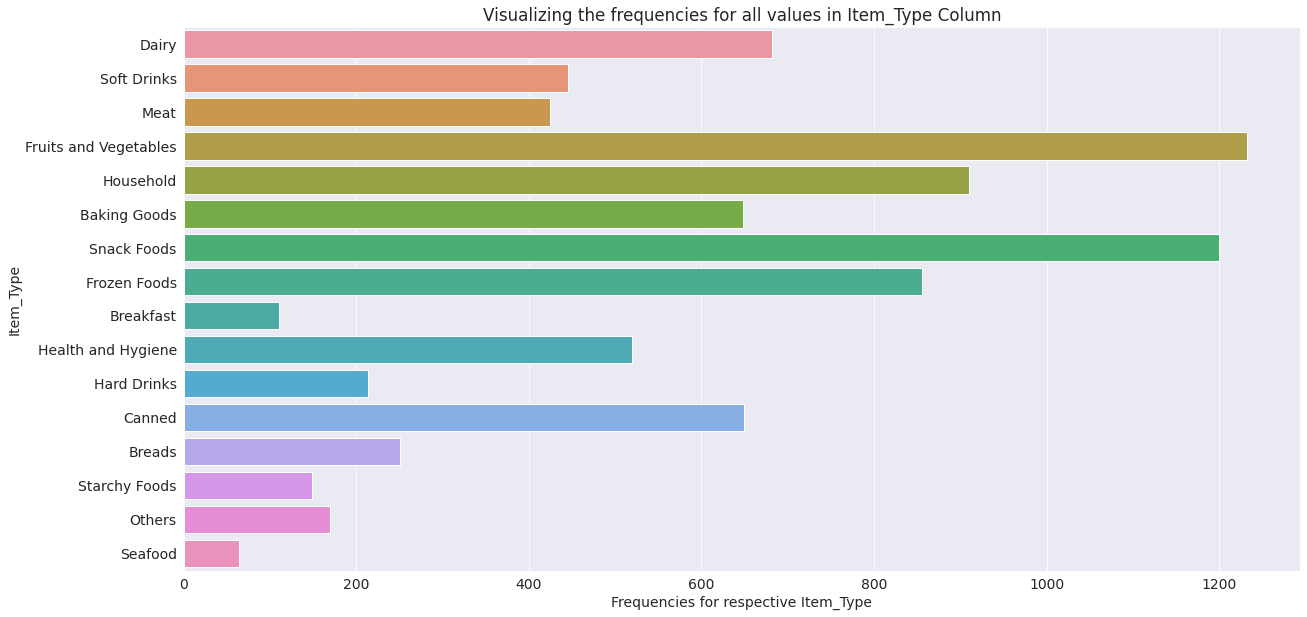

In [823]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars

sns.countplot(y = 'Item_Type', data = df).set(title = 'Visualizing the frequencies for all values in Item_Type Column')
plt.xlabel('Frequencies for respective Item_Type');

We can clearly see that items belonging to type `Fruits and Vegetables` are sold mostly. This is most likely because fruits and vegetables are consumed daily by many people.

Items belonging to Seafood are sold the lowest. This could be because seafood items are generally expensive in nature. Similarly, Snack Foods are also sold very much. This could be because snacks are generally cheap and easily available.

<b> For Outlet_Size Column </b>

In [824]:
# dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series

df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

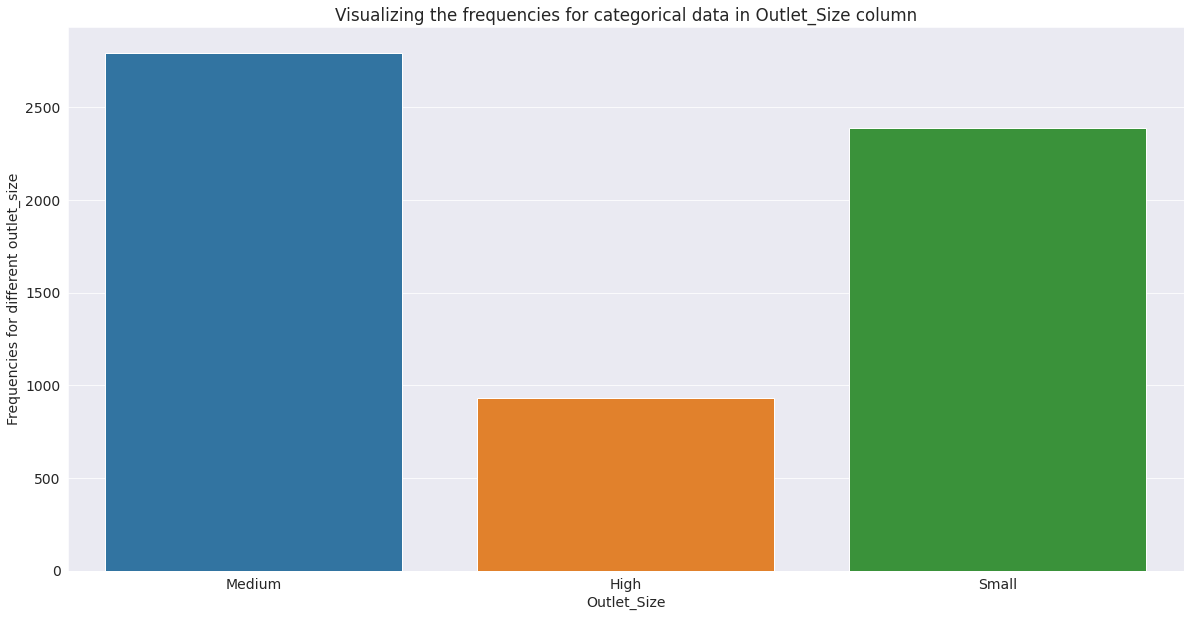

In [825]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars

sns.countplot(x = df.Outlet_Size).set(title = 'Visualizing the frequencies for categorical data in Outlet_Size column')
plt.ylabel('Frequencies for different outlet_size');

We can clearly see that the majority of outlets/stores are of medium size. Similarly, few outlets are of high size. We can also make a conclusion that the number of Medium and Small size for the outlets are thrice and twice as many as the number of high size outlets in this column.

In [826]:
# dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series

dict1 = dict(df.Outlet_Size.value_counts())

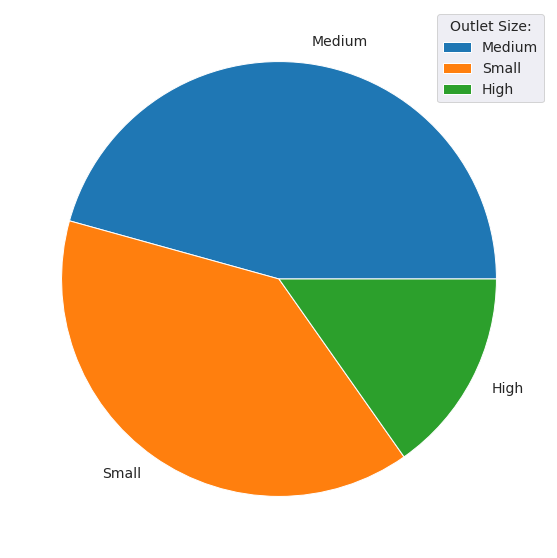

In [827]:
# plotting a pie chart using matplotlib
plt.pie(x = list(dict1.values()), labels = list(dict1.keys()))
plt.legend(title = "Outlet Size:");

We have visualized the frequency of 3 unqiue categorical data for this column using a pie chart. This is also done in the countplot above.

<b> For Outlet_Location_Type Column </b>

In [828]:
# dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series

df.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

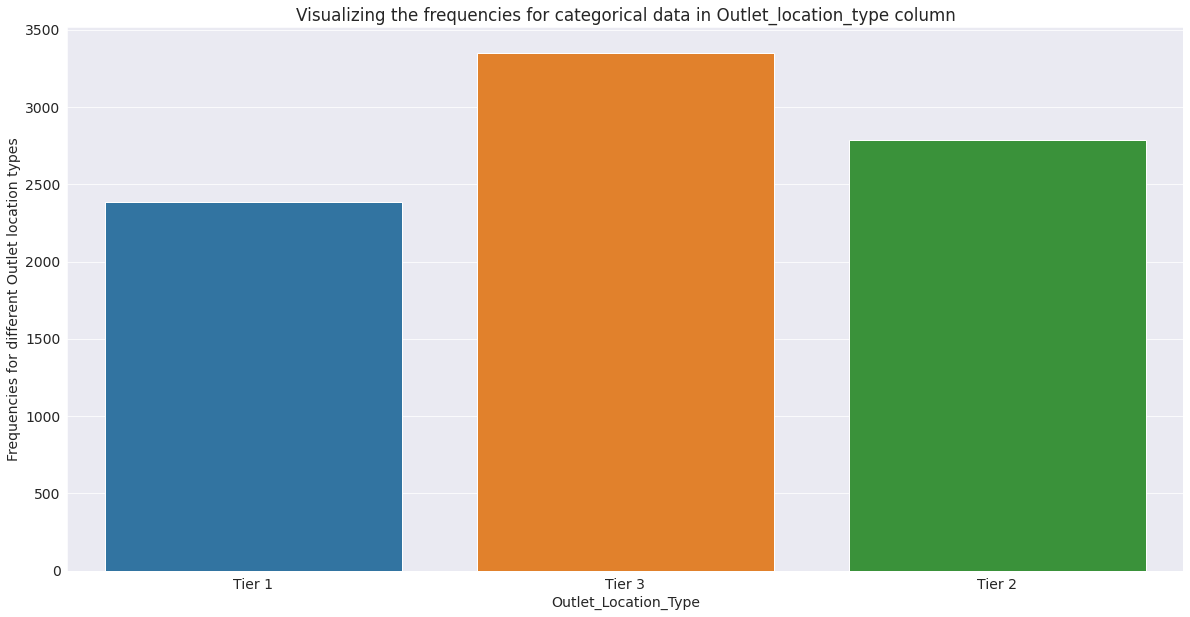

In [829]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars

sns.countplot(x = df.Outlet_Location_Type).set(title = 'Visualizing the frequencies for categorical data in Outlet_location_type column')
plt.ylabel('Frequencies for different Outlet location types');

From the above plot, we can clearly see that there are significantly more Tier 3 outlet/store location type than the other two. Tier 1 outlet location type is present twice when compared to Tier 3 outlet location type.

<b> For Outlet_Type Column </v>

In [830]:
# dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series

df.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

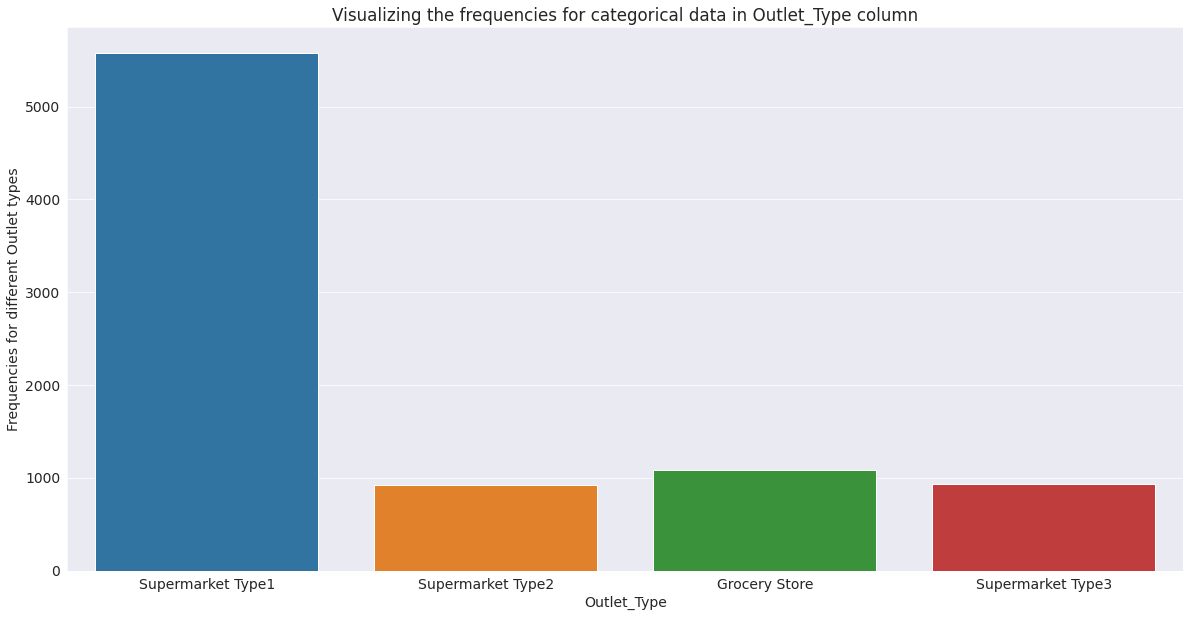

In [831]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars
sns.countplot(x = df.Outlet_Type).set(title = 'Visualizing the frequencies for categorical data in Outlet_Type column')
plt.ylabel('Frequencies for different Outlet types');

We can clearly see that the Supermarket Type1 outlet/store type is present in more than almost 75 % of all data for this column. Other outlet types like Supermarket Type2 and Supermarket Type 3 make up for the smallest number of unique categorical values in this column.

<b> Item_Outlet_Sales </b>

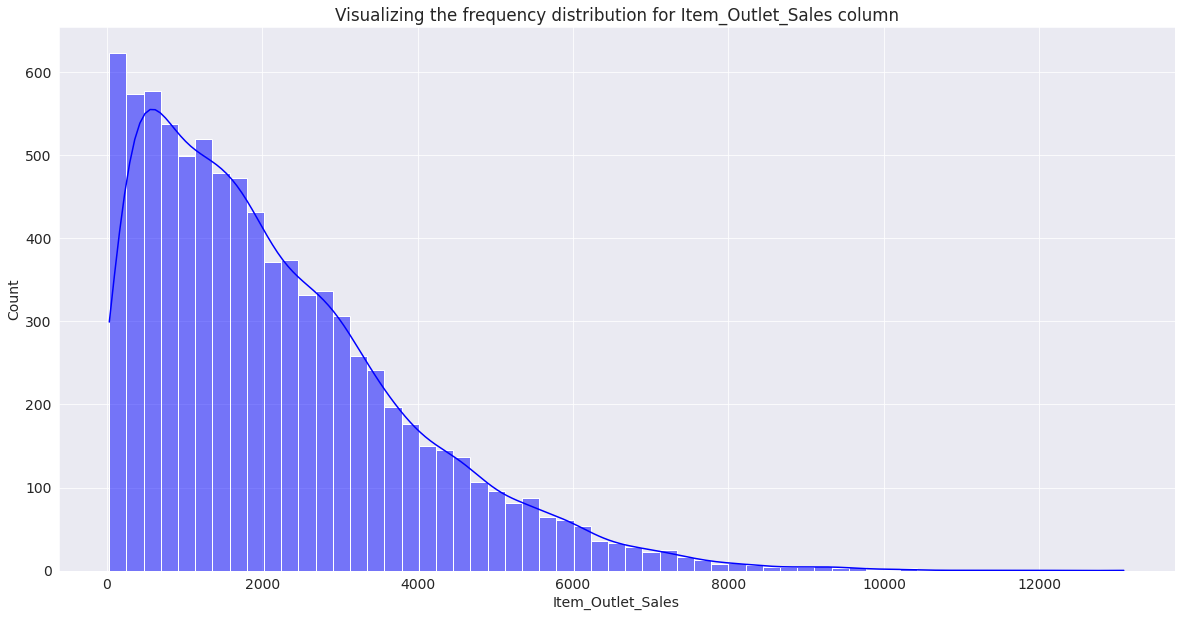

In [832]:
# This method is used to plot univariate or bivariate histograms to show distributions of datasets

sns.histplot(x = df['Item_Outlet_Sales'], kde = True, color = 'blue').set(title = 'Visualizing the frequency distribution for Item_Outlet_Sales column');

The data in this column is continuous. Therefore, the histogram plotted using seaborn above, clearly shows us that the data is positive or right skewed. There also seem to be outliers in the right extreme of the histogram. We will also check that by plotting a boxplot for this column.

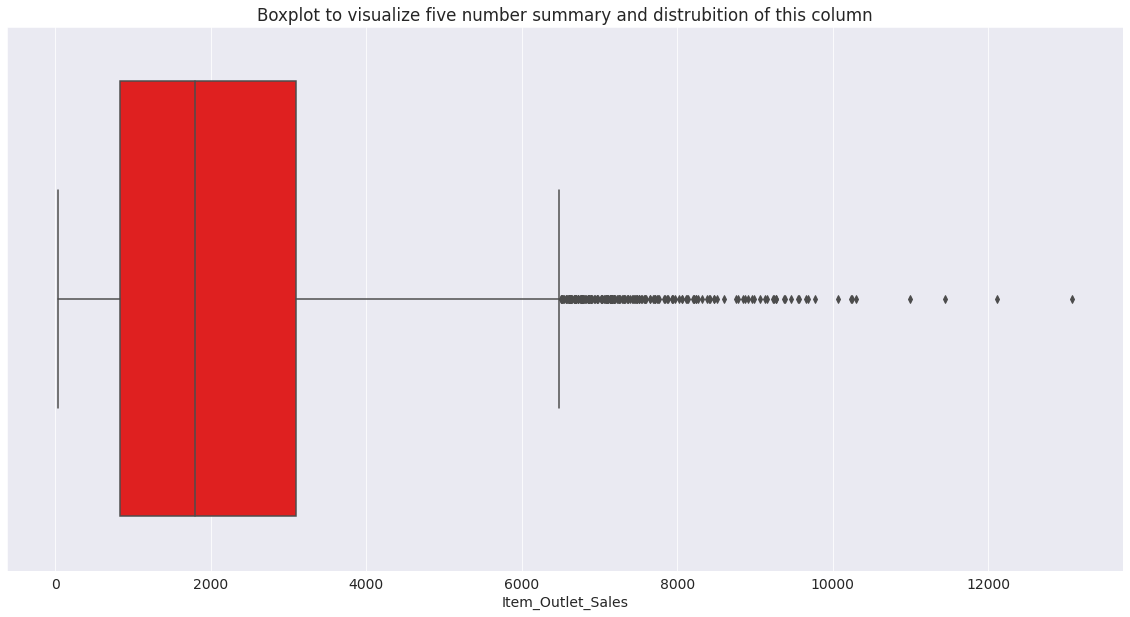

In [833]:
# this is used to plot a boxplot that also helps us to visualize the 5 number summary
sns.boxplot(x = df['Item_Outlet_Sales'], color = 'red').set(title = 'Boxplot to visualize five number summary and distrubition of this column');

As shown in histogram, the boxplot above also shows that there is a significant presence of outliers in this column, Furthermore, the median is close to the first quartile indicating that the data in this column is right skewed. This means, the data is not symmetrical.

In case of positive skewness, the order of mean, median, and mode is:

    mean > median > mode

In case of negative skewness, the order of mean, median, and mode is:

    mode > median > mean


<b> For Item_Fat_Content vs Item_Outlet_Sales </b>

In [834]:
# only using two columns from the original dataframe
df[['Item_Outlet_Sales', 'Item_Fat_Content']]

,Item_Outlet_Sales,Item_Fat_Content
0,3735.1380,Low Fat
1,443.4228,Regular
2,2097.2700,Low Fat
3,732.3800,Regular
4,994.7052,Low Fat
...,...,...
8518,2778.3834,Low Fat
8519,549.2850,Regular
8520,1193.1136,Low Fat
8521,1845.5976,Regular


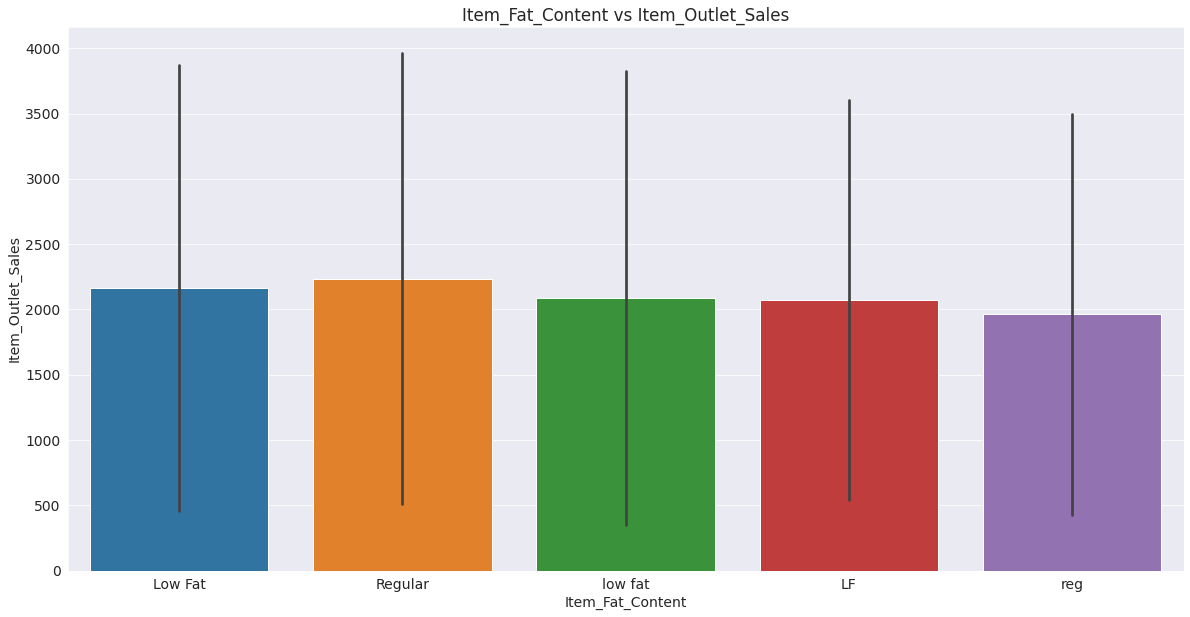

In [835]:
# this is used to plot a barplot using seaborn library
sns.barplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df, ci = 'sd').set(title = 'Item_Fat_Content vs Item_Outlet_Sales');

In [836]:
df[df.Item_Fat_Content == 'Regular'][['Item_Outlet_Sales']].std()

Item_Outlet_Sales    1727.715941
dtype: float64

In [837]:
df[df.Item_Fat_Content == 'Regular'][['Item_Outlet_Sales']].mean()

Item_Outlet_Sales    2235.186702
dtype: float64

The following conclusions were made by analyzing the above barplot:

  1. Among the unique categorical values present in the Item_Fat_Content column, the value Regular has the highest mean outlet/store sales. 

  2. The Black lines represent the standard deviation for the corresponding categorical value.

<b> Item Visibility vs Item_Outlet_Sales

In [838]:
df[['Item_Visibility','Item_Outlet_Sales']]

,Item_Visibility,Item_Outlet_Sales
0,0.016047,3735.1380
1,0.019278,443.4228
2,0.016760,2097.2700
3,0.000000,732.3800
4,0.000000,994.7052
...,...,...
8518,0.056783,2778.3834
8519,0.046982,549.2850
8520,0.035186,1193.1136
8521,0.145221,1845.5976


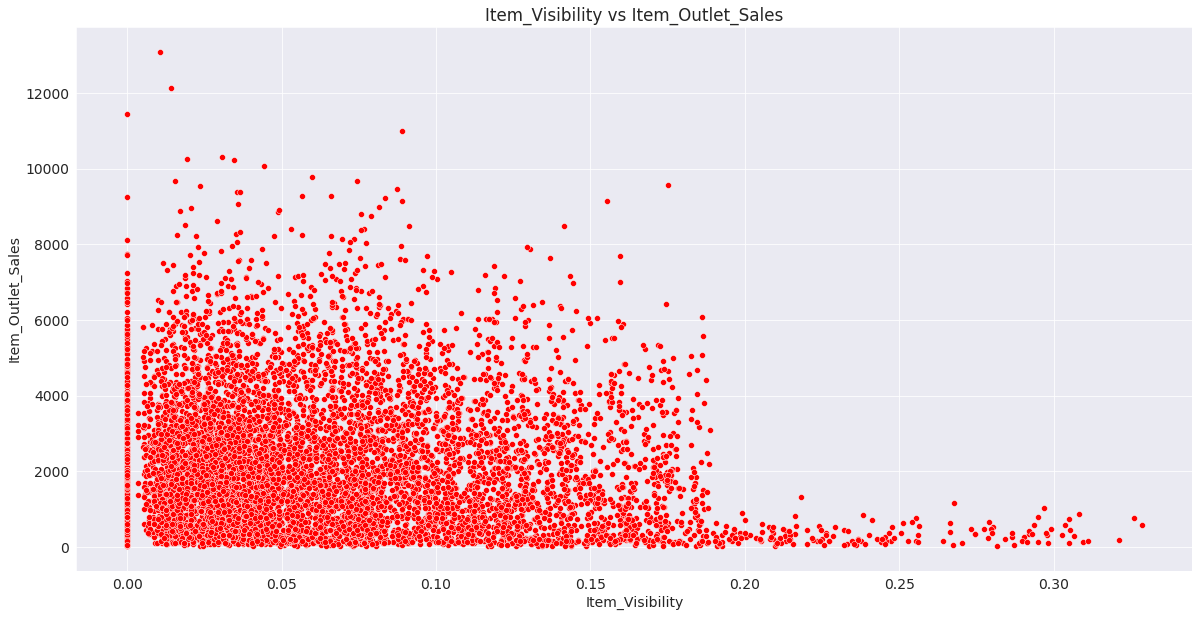

In [839]:
# this is used to plot a scatterplot using seaborn

sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df, color = 'red').set(title = 'Item_Visibility vs Item_Outlet_Sales');

We know that the Item_Visibility has minimum value 0. From the scatterplot above, we can clearly see that, there are items with item_visibility 0, but still hae a certain item_outlet_sales.

This is not possible because when the visibility if a item is 0, it cannot be sold. So, I will also perform preprocessing in the data for this column in our data cleaning step. 

Other than that, this scatterplot shows us that, in general, the Item_Visibility and Item_Outlet_Sales are somewhat mildly strongly positively correlated with Item_Outlet_Sales meaning that increment in one will most likely increase the other.

So, lets consider the values in Item_Visibility that are 0 as Null.And, lets impute them.

In [840]:
# sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df).set(title = 'Updated Item_Visibility vs Item_Outlet_Sales');

This makes much more sense as items that have lowest visibility tend to be purchased less by the customers.

<b> Item_Type vs Item_Outlet_Sales </b>

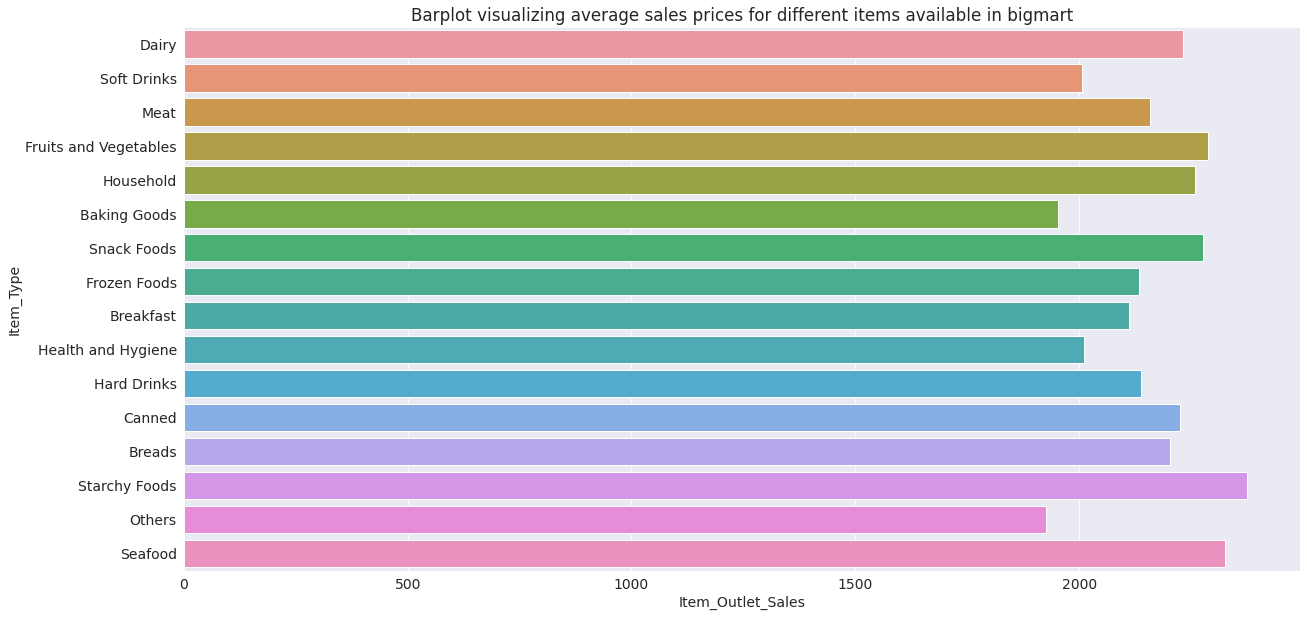

In [841]:
# this is used to plot a barplot using matplotlib
sns.barplot(x = 'Item_Outlet_Sales', y = 'Item_Type', data = df, ci = None).set(title = 'Barplot visualizing average sales prices for different items available in bigmart');

We can clearly see that the items belonging to Starchy Foods and Seafood types are the most expensive, on average. Similarly, the items belonging to others category have lowest average item outlet sales.

<b> Item_Outlet_Sales vs Item_MRP</b>

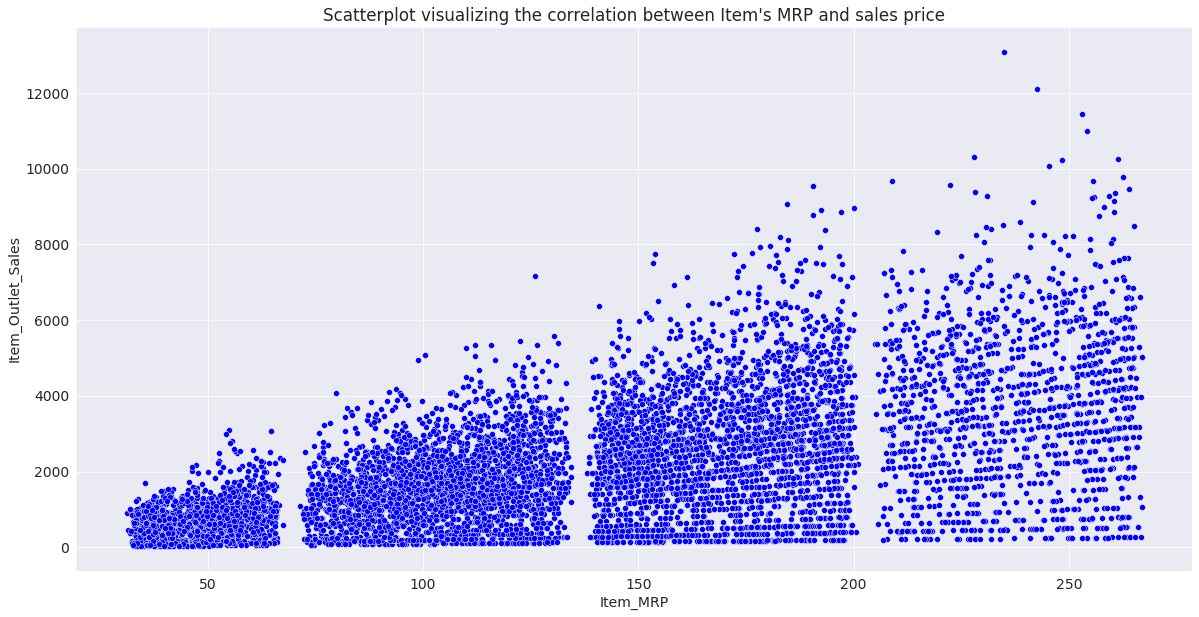

In [842]:
# this is used to plot a scatterplot using seaborn
sns.scatterplot(y = 'Item_Outlet_Sales', x = 'Item_MRP', data = df, color = 'blue').set(title = 'Scatterplot visualizing the correlation between Item\'s MRP and sales price');

The columns, Item_MRP and Item_Outlet_Sales, seem to have strong positive correlation. This means, higher the MRP price could result in a high sales price for an item in bigmart.

We can also clearly see that the items that have MRP in between 200 to 250 have the highest Item_outlet_sales.

<b> Outlet_Location_Type vs Item_Outlet_Sales	 </b>

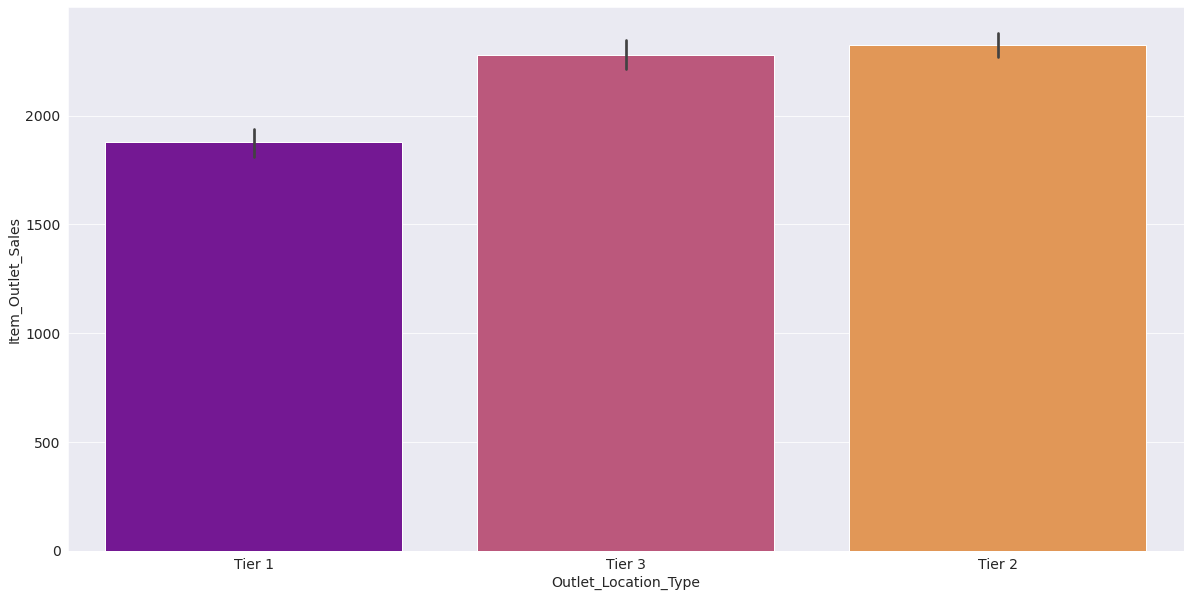

In [843]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df,palette='plasma')

We can clearly see that the items in the Tier 2 location are, on average, more expensive than the items on other two locations.

<b> Outlet_Location_Type vs Item_Outlet_Sales vs Outlet_Type </b>

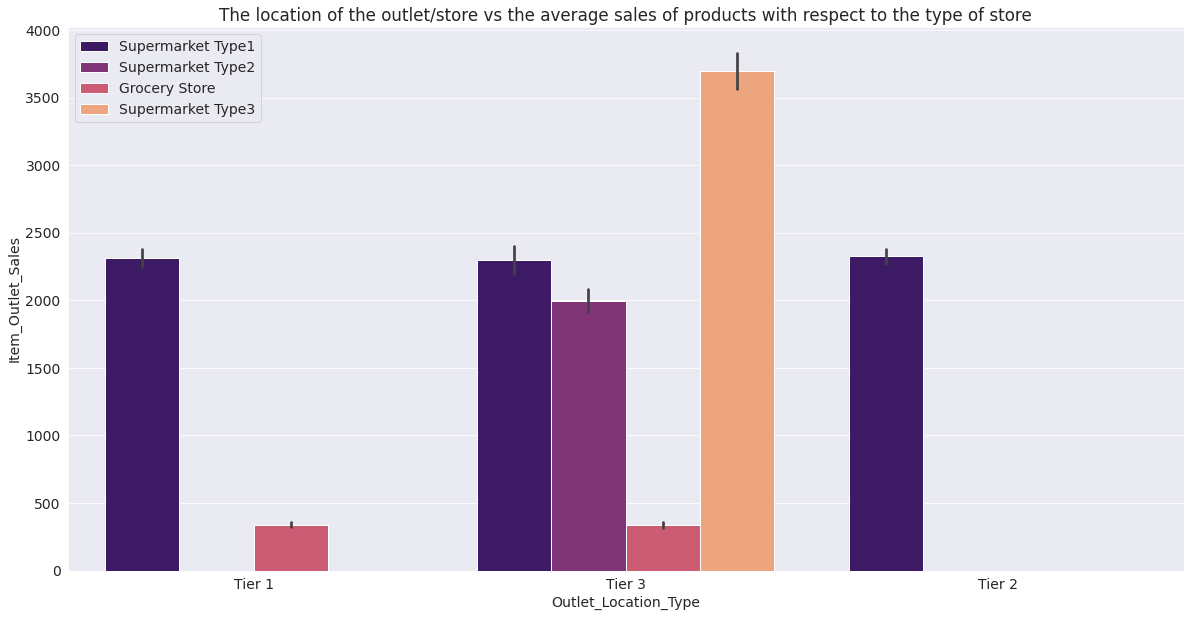

In [844]:
sns.barplot(x = 'Outlet_Location_Type',y = 'Item_Outlet_Sales',hue='Outlet_Type',data=df,palette='magma').set(title = 'The location of the outlet/store vs the average sales of products with respect to the type of store')
plt.legend();

We can clearly see that stores belonging to Tier 3 city/location have, in average, very high sales price as compared with other two locations. Furthermore, in the Tier 3 location, items sold at Supermarket Type 3 have the highest average sales price. 

<b> For Item_Type Column

In [845]:
# dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series

df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

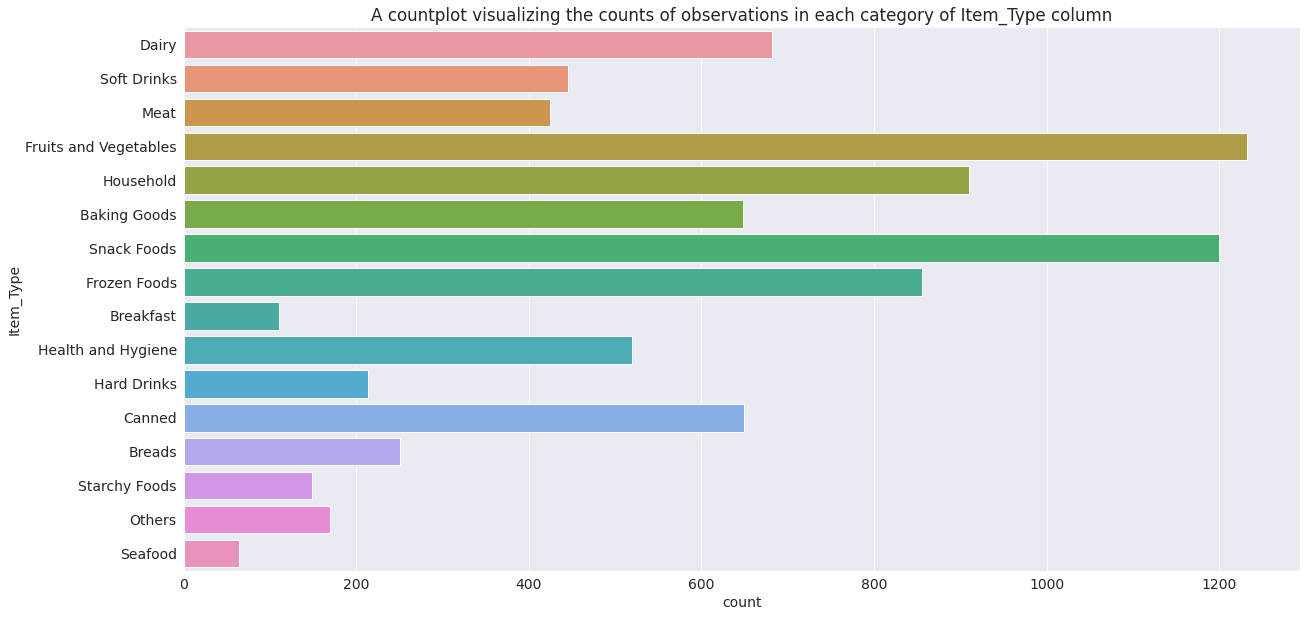

In [846]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars

sns.countplot(y = df.Item_Type).set(title = 'A countplot visualizing the counts of observations in each category of Item_Type column');

We can cleary see that, accross all stores, there are significantly more Fruits and Vegetables related items. This could be the case as Fruits and Vegetables in general are consumed more by the customers and they are relatively cheaper than other items.

Similarly, Seafood items are of lowest quantity. This could be the case because Seafood items are generally expensive and not everyone can afford it.

<b> Outler_Size, Outler_Location_Type,and Outlet_Type vs Item_Outlet_Sales </b>

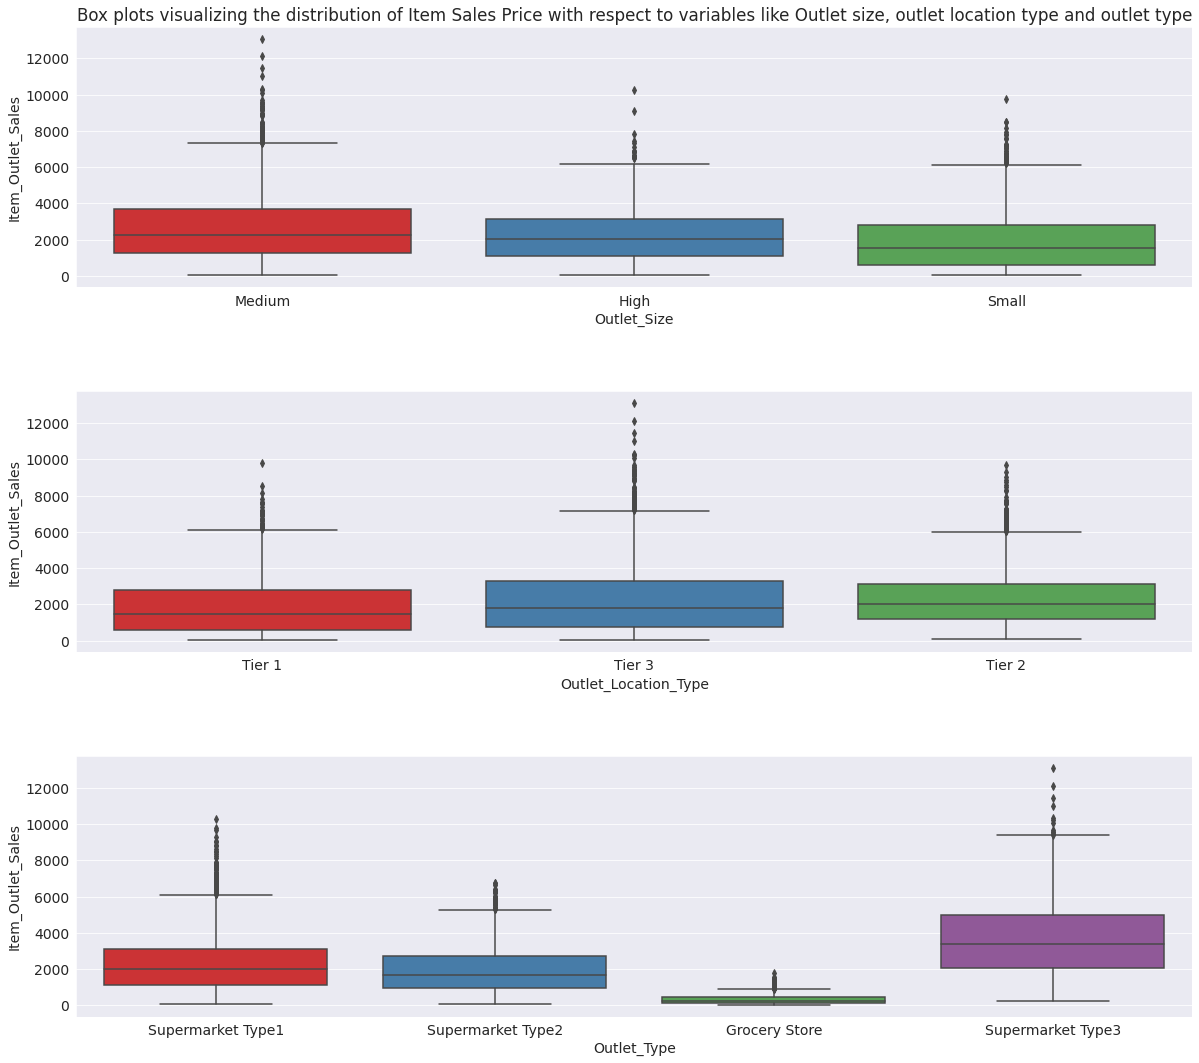

In [847]:
# Using subplots for plotting multople plots
plt.subplot(3,1,1) # the arguments simply denote that we need 3 rows and 1 column each for plotting 3 plots
# the title of our boxplots
plt.title("Box plots visualizing the distribution of Item Sales Price with respect to variables like Outlet size, outlet location type and outlet type")
# first boxplot
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette="Set1")

# second boxplot
plt.subplot(3,1,2)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette="Set1")

# third boxplot
plt.subplot(3,1,3)   
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette="Set1")


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)
plt.show();

We can visualize five number summary (Q1,Q3,Minimum, Maximum, and median, and the distribution of item sales price in stores with respect to multiple categorical variables present in different columns like store type, store location type and store size through the series of boxplots above.

<b> Item_Type vs Item_Outlet_Sales </b>

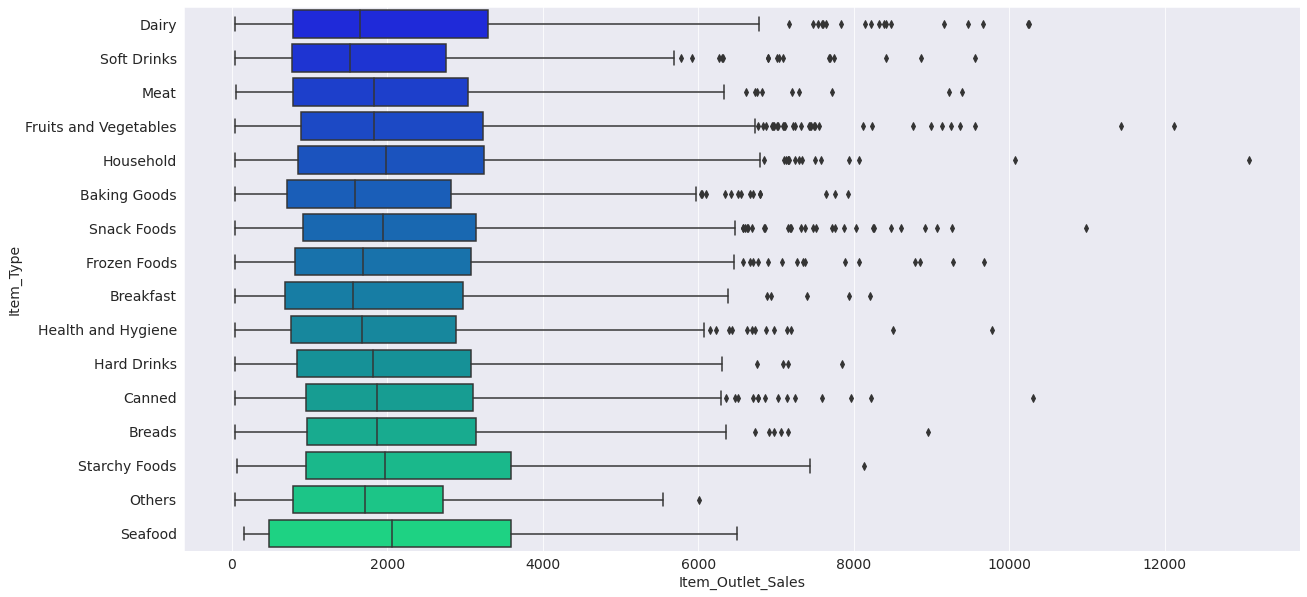

In [848]:
sns.boxplot(y='Item_Type', x='Item_Outlet_Sales', data=df, palette="winter");

We can visualize five number summary (Q1,Q3,Minimum, Maximum, and median, and the distribution of item sales price in stores with respect to multiple categorical variables present in Item_Type column through the boxplots above.

From the plots before, we concluded that the Seafood items are the very expensive. This conclusion is further supported by the plot above. For the Seafood type item in stores, their minimum sales price is higher than all other item indicating that even the cheapest seafood items are more expensive than others. Similarly, the median price for seafood items is also expendive  than others.

However, some food items belonging to Starchy Food types have the most expensive sales prices on all stores.

<b> Visualizing and Analyzing the correlation between multiple columns </b>

In [850]:
# the dataframe.corr() method computes the pairwise correlation of columns
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


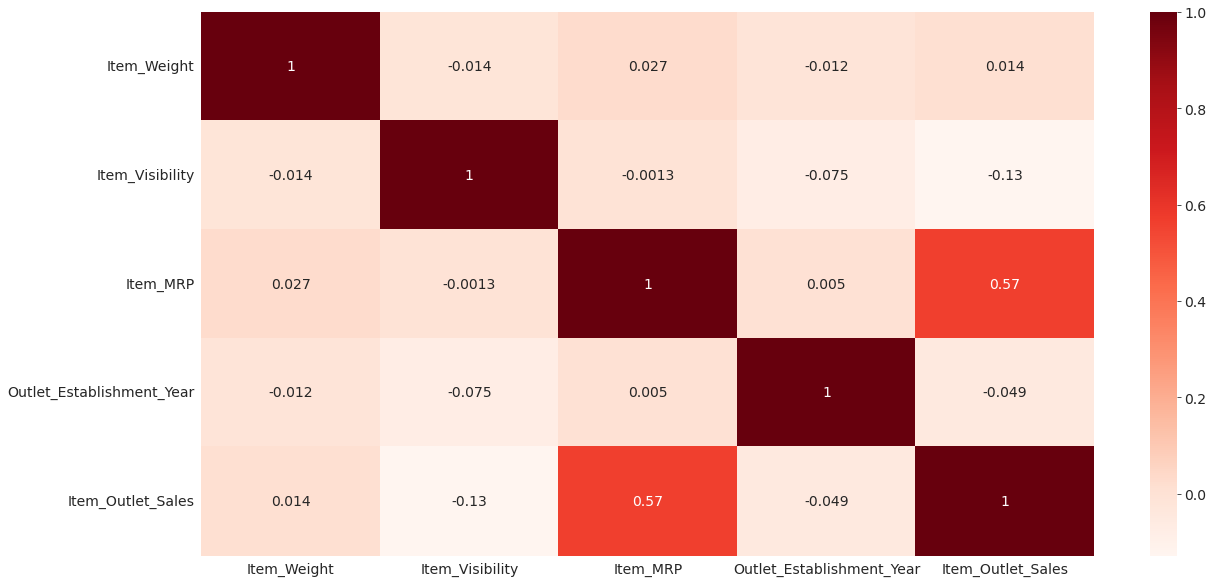

In [851]:
# plotting a heatmap to properly visualize the correlation
sns.heatmap(df.corr(),cmap='Reds', annot=True);

By default, df.corr() method computes the pearson correlation coefficient, and that is being visualized using the heatmap above.

Lets interpret the correlation coefficients:

  1. The Pearson Correlation Coefficients lie in the range of -1 to +1.
  
  2. The magnitude of the correlation coefficients denote how strong the relationship between different features is. If the absolute value of correlation coefficient is greater, the relationship between corresponding features will also be stronger and vice versa. This means, the values 1 and -1 represent a perfect linear relationship such that a change in one feature will result in a consistent change in another feature.

  3. If a correlation coefficient is zero, there is no linear relationship between features.

  4. The sign of the correlation coefficient denotes the direction of relationship of features. This means, if two features are strongly negatively correlated, the rise in one feature will result in consistent decrease in other feature. 


From the heatmap above, we can make this observation:

  1. Item_MRP and Item_Outlet_Sales are strongly positively correlated. This means, rise in MRP price of an item will result in higher sales price for that item. Higher the MRP price, higher will be the sales price for the item.

## 3.  Data Cleaning

In the data cleaning step, we will mainly perform two operations: `Preprocessing` and `Feature Engineering`.

1. `Preprocessing`: In this substep, we will clean and replace data in categorical columns like Item_Fat_Content where same variable was present in multiple forms. For example, value Regular and reg were the same. We will also remove outliers from numerical columns, encoding categorical columns, imputing null values, and finally scale our columns. However, We will only perform feature scaling after our `Feature Selection` step from `Feature Engineering` concludes.

2. `Feature Engineering`: In this substep, We will perform two substeps. They are:
  2.1 `Feature Extraction`: In this substep, we will use the available features to extract new features. 

  2.2 `Feature Selection`: In this substep, we will finalize and select columns for training and model. Not all features will help improve the performance of our model. Some features will wear our model performance down and increase loss function. Such features are best dropped. Finally, after finalizing our featues, I will perform `feature scaling` from the `preprocessing` stage.

### 3.1 Performing Preprocessing on Columns

#### 3.1.1 Inputing Null Values

In [852]:
# viewing all available columns and their corresponding total null values
dict(df.isnull().sum())

{'Item_Fat_Content': 0,
 'Item_Identifier': 0,
 'Item_MRP': 0,
 'Item_Outlet_Sales': 0,
 'Item_Type': 0,
 'Item_Visibility': 0,
 'Item_Weight': 1463,
 'Outlet_Establishment_Year': 0,
 'Outlet_Identifier': 0,
 'Outlet_Location_Type': 0,
 'Outlet_Size': 2410,
 'Outlet_Type': 0}

In [853]:
# lets get the columns that have missing values in our train_df
columns_with_null_values = [i for i in dict(df.isnull().sum()) if dict(df.isnull().sum())[i] > 0];columns_with_null_values

['Item_Weight', 'Outlet_Size']

In [854]:
for i in columns_with_null_values:
  print("The column "+i+" has {} null values".format(df[i].isnull().sum()))

The column Item_Weight has 1463 null values
The column Outlet_Size has 2410 null values


<i> We impute null values in respective columns with a best measure of central tendancy. i.e Mean, Mode, and Median </i>

Since, there are Null values, we have two options:
  1. Get rid of the rows containing null values
  2. Fill the null values

If we remove all rows containing atleast 1 null value, we will loose a lot of data. So, the step is not very feasible considering we only have about 8000 rows in our training set. The other step is to fill the null values in the corresponding rows of respective columns.

The method of filling null values in a column with a particular number is called `Imputation`

<b> Imputing Item_Weight column </b>

Here, We will be imputing Null values from Item_Weight column using the best measure of central tendancy.

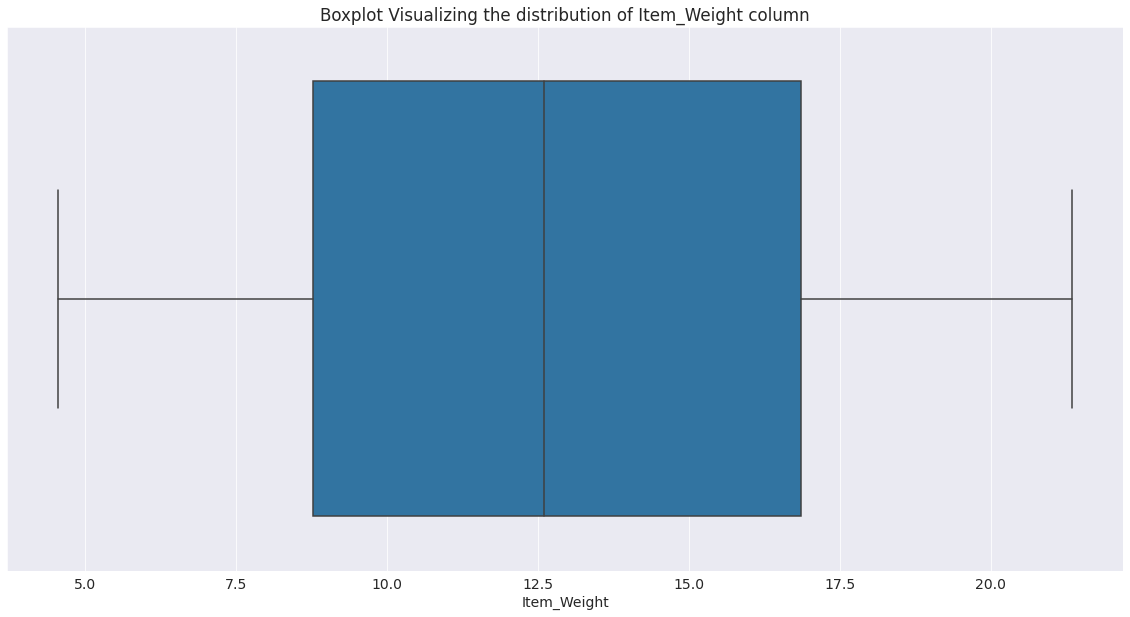

In [855]:
# creating a boxplot using seaborn library
sns.boxplot(x = 'Item_Weight', data = df).set(title = 'Boxplot Visualizing the distribution of Item_Weight column');

From the above boxplot, we can find out the five number summary of the Item_Weight column. For this column, 
  1. First Quartile(q1) = 8.77
  2. Seconf Quartile(q2) = 12.60
  3. Third Quartile(q3) = 16.085
  4. The Minimum: 4.555
  5. The Maximum: 21.35

Furthermore, we can also see that there are no outliers in the Item_Weight column from the boxplot above.This can also be verified from the histogram below.

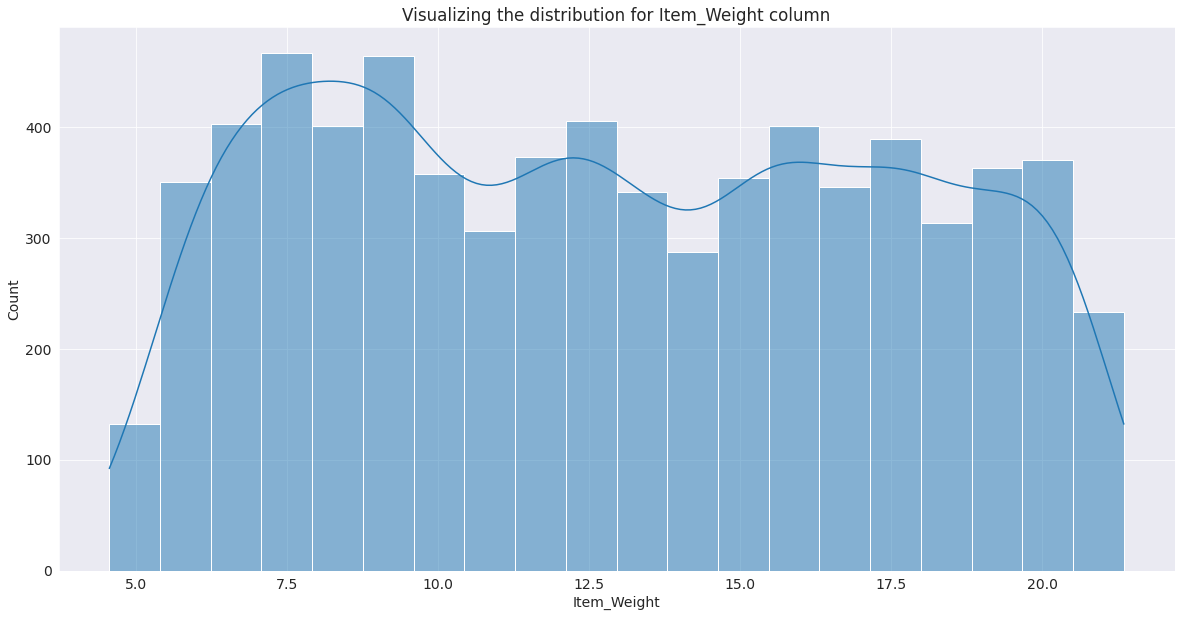

In [856]:
# using seaborn to create a histogram
sns.histplot(x = 'Item_Weight', data = df, kde = True).set(title = 'Visualizing the distribution for Item_Weight column');

In [857]:
df['Item_Weight'].mean()

12.857645184136183

From the histogram above, we can clearly see that all values in the given intervals are close to mean. i.e 12.85.

We know, IQR(Inter Quartile Range) = q3 - q1 = 16.085 - 8.77 = 7.315

So, We know that, outlier formula is:

    = [q1 - 1.5 * IQR, q3 + 1.5 * IQR]
    = [8.77 - (1.5 * 7.315), 16.085 + (1.5 * 7.315)]
    = [-2.2,27.05]


So, all values outside of this range are considered outliers for this column. However, from the above histogram, we can clearly see that all datapoints fall in the given range which stregthens our conclusion that out Item_Weight column doesnot have any outliers.

Since there are no outliers, the best measure of central tendancy to impute null values is mean. If there were outliers, mean would be significantly influenced by outliers. Therefore, we would have needed to use median to impute null values. Since this is not the case, we will use mean.

In [858]:
# dataframe.fillna() methods takes in the value to replace the null value in the respective item, whereas inplace = True means to make change in original dataframe
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)
df['Item_Weight'].isnull().sum()

0

`NOTE: We can also use sklearn.impute.SimpleImputer class and pass parameter strategy = mean to impute null values for this column.`

<b> For Outlet_Size column

In [859]:
# getting the number of null values for this column
df['Outlet_Size'].isnull().sum()

2410

In [860]:
print("For training dataframe")
print(df['Outlet_Size'].value_counts())  # dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series

For training dataframe
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Since this column contains categorical data, the best measure of central tendancy to fill null values is mode. Mode is simply the measure of central tendancy that aims to find the item with the highest frequency. 

We can clearly see from the last code cell that there are 2793 Medium sized items in this column in the training dataframe, which is highest among other categories. Thus,it can be concluded that the mode for this column is `Medium`.

So, we will use the mode to impute null values for this column in our dataframe.

In [861]:
# getting the mode for outlet_size column
df.Outlet_Size.mode()[0]

'Medium'

In [862]:
# dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series

df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [863]:
# creating a dataframe for visualizing the frequency of unique categorical values in outlet_size column

mixed_Outlet_Size = pd.DataFrame({
    'Types':['High','Small','Medium'],
    'Train':[932,2388,2793]
});mixed_Outlet_Size

,Types,Train
0,High,932
1,Small,2388
2,Medium,2793


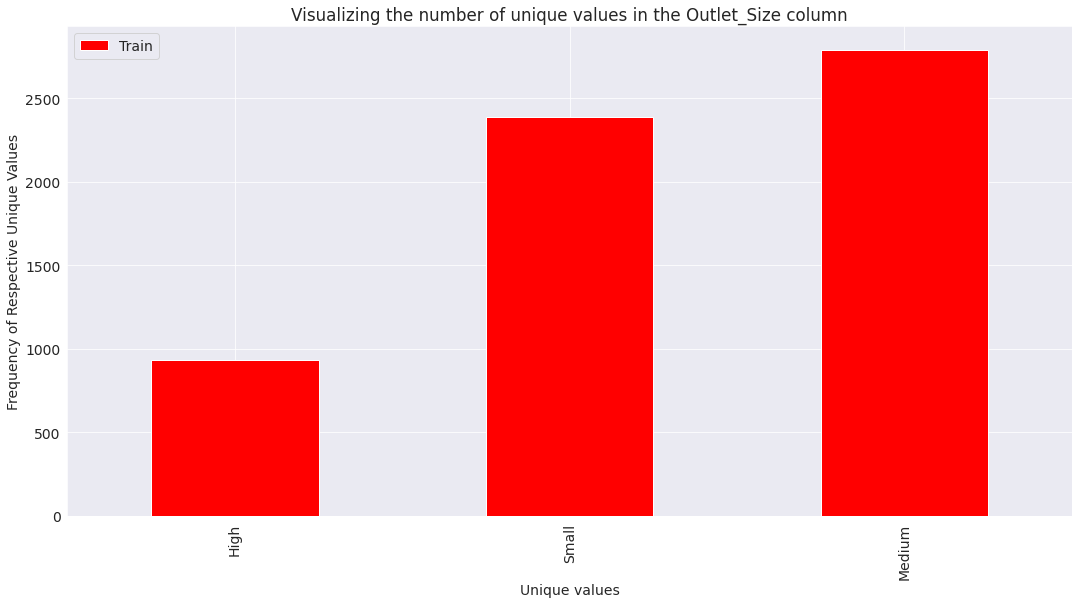

In [864]:
# visualizing the frequency of unique categorical values in outlet_size column

mixed_Outlet_Size.set_index('Types').plot(kind='bar', stacked=False, figsize=(18,9), color = 'red')
plt.title("Visualizing the number of unique values in the Outlet_Size column")
plt.xlabel("Unique values")
plt.ylabel("Frequency of Respective Unique Values");

Hence, we can also see from the barplot above that the mode for  for column `Outlet_Size` is value `Medium`. Hence, we will use this value for imputing null value in the Outlet_Size column.

In [865]:
df['Outlet_Size'].fillna('Medium', inplace = True)
df['Outlet_Size'].isnull().sum()

0

<b> Lets check our dataframe for null values one last time </b>

In [866]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### 3.1.2 Cleaning data from Columns

<b> Cleaning Item_Fat_Content column </b>

In [867]:
# dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series

df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

From the data analysis step, we came to the conclusion that the categorical values Low Fat, LF,and lwo fat are the same in the Item_Fat_Content column. The same case also applies for the Regular and reg categorical values. Therefore, We will replace these duplicates values with a single values such that there are only two unique categorical values in this columm, Low Fat and Regular.

In [868]:
'''
dataframe[column_name].replace method  takes two keyword arguments to_replace and value where to_replace takes in the value to replace,
and value takes in the new values to replace the old values with,
inplace = True simply means to make the changes in the original dataframe and not return a copy of the original dataframe'''

df['Item_Fat_Content'].replace(to_replace = ['LF','reg', 'low fat'], value = ['Low Fat','Regular','Low Fat'], inplace = True)  

In [869]:
# dataframe..value_counts()/ series.value_counts() return a Series containing counts of unique rows in the DataFrame or series

df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Thus, the misspelled/miscoded categorical values in this column have been cleaned. Lets visualize the count of unique categorical values for this updated column using seaborn.

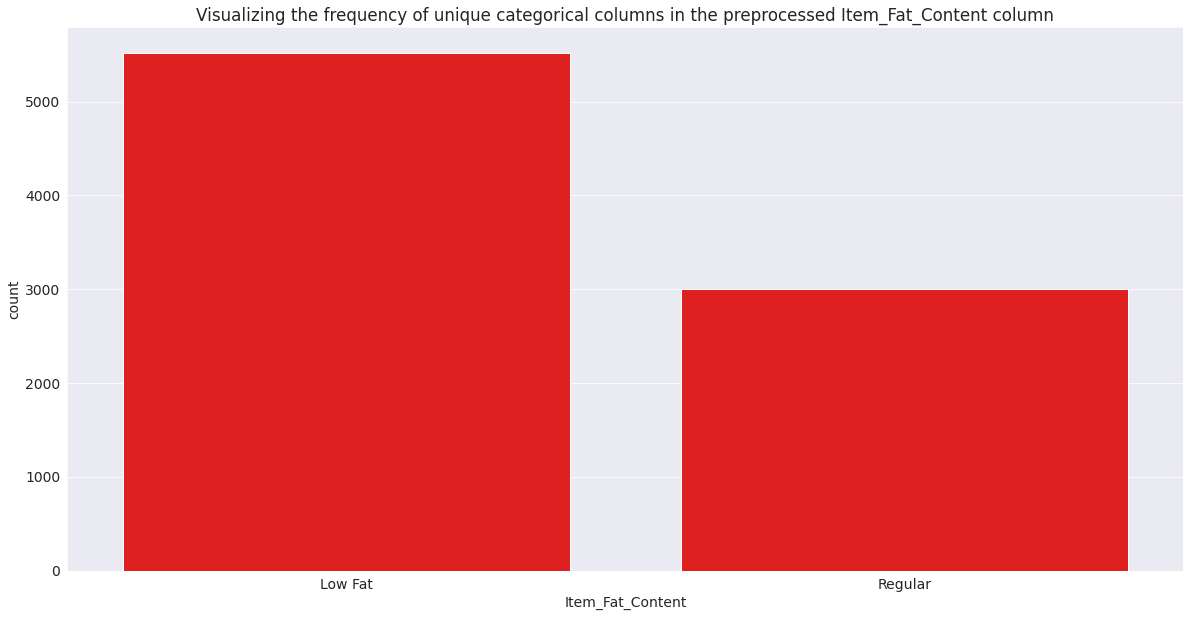

In [870]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars

sns.countplot(x = df['Item_Fat_Content'], color = 'red').set(title = 'Visualizing the frequency of unique categorical columns in the preprocessed Item_Fat_Content column');

In [871]:
# df['No_Of_Years_Established'] = df['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)
# #test_df['No_Of_Years_Established'] = test_df['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

<b> Cleaning Item_Visibility </b>

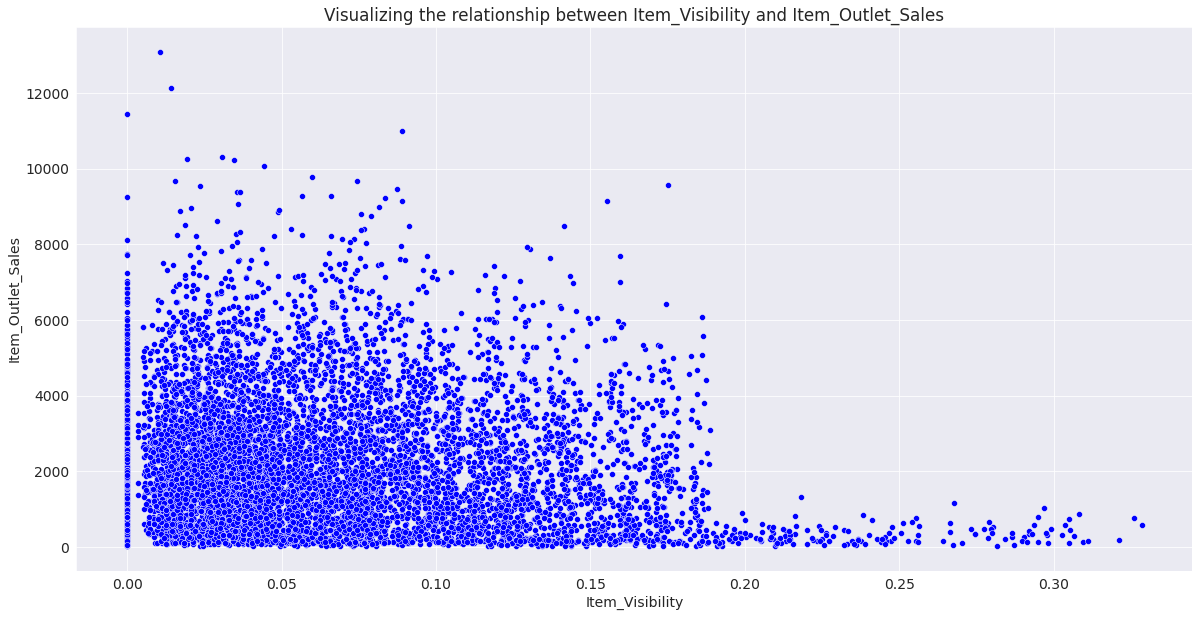

In [872]:
# plotting a scatterplot
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df, color = 'blue').set(title = 'Visualizing the relationship between Item_Visibility and Item_Outlet_Sales');

From the scatterplot above, we can clearly see that there are a number of Items whose visibility is 0 but their sales price ranges from 0 to almost 12000. This makes no sense because items that are not visible cannot be sold. So, in that sense, the values in Item_Visibility column that are zero will need to be either dropped or replaced with another value. So, we will check if there are outliers in this column using boxplot. If there are no outliers, we will use mean for replacing otherwise will use median.

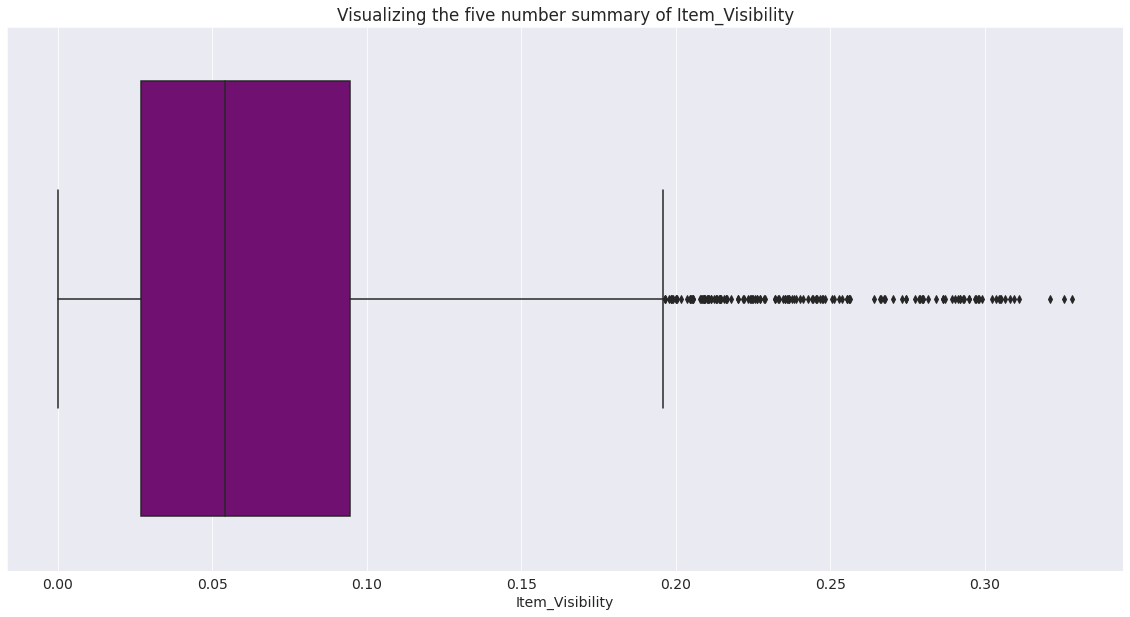

In [873]:
# plotting a boxplot
sns.boxplot(x = 'Item_Visibility', data = df, color = 'purple').set(title = 'Visualizing the five number summary of Item_Visibility');

We can clearly see that there are outliers. Hence, we will use median to replace zeroes in this column.

In [874]:
# replacing zeroes with median
df['Item_Visibility'] = df['Item_Visibility'].replace(to_replace = 0, value = df['Item_Visibility'].median())

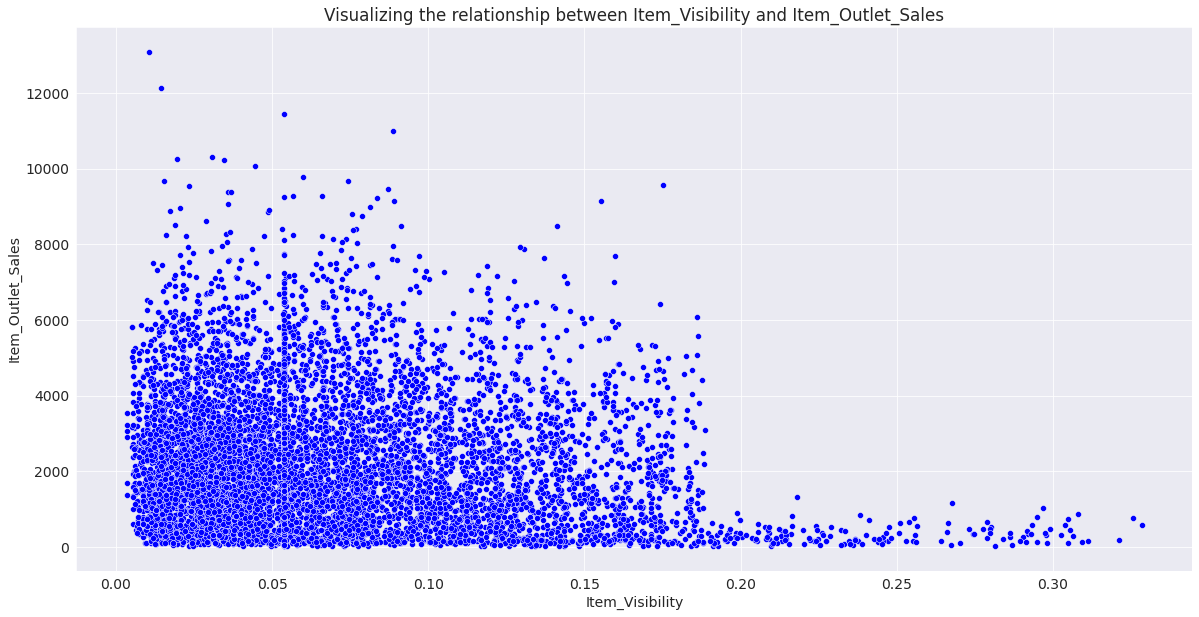

In [875]:
# plotting a scatterplot
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', data = df, color = 'blue').set(title = 'Visualizing the relationship between Item_Visibility and Item_Outlet_Sales');

Now, the data in this column makes much more sense. 

<b> Cleaning Item_Identifier Column <b>

In [876]:
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCF42     9
FDW26     9
FDX04     9
         ..
FDK57     1
FDE52     1
FDN52     1
FDT35     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64

It looks like there are many unique categorical values in this column. If we look closely, we can notice that in all values, their first two characters tell us there are 3 unique categories. i.e FD means Food, NC means Non Consumable and DR means Drinks. Hence, we will perform preprocessing of this column in this way.

In [877]:
# using lambda function to apply slicing to get first two characters of all values in this column
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[0:2]);df['Item_Identifier']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8523, dtype: object

In [878]:
# using dictionary mapping to replace corresponding keys with respective values
df['Item_Identifier'] = df['Item_Identifier'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Identifier'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Identifier, dtype: int64

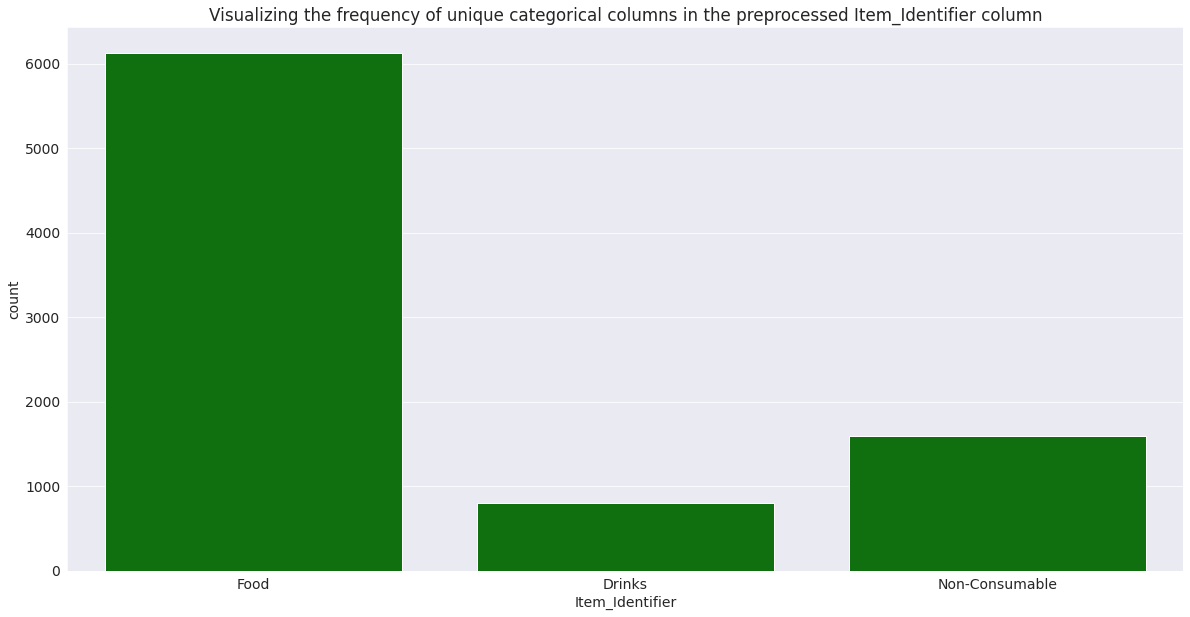

In [879]:
# A countplot is a kind of histogram accross a categorical variable that show the counts of observations in each categorical bin using bars

sns.countplot(x = df['Item_Identifier'], color = 'green').set(title = 'Visualizing the frequency of unique categorical columns in the preprocessed Item_Identifier column');

#### 3.1.3 Check and Remove Duplicates

Lets check if there are any duplicates in our data. If there are duplicates in our data, we will use dataframe.drop_duplicates() method to remove them.

In [880]:
# dataframe.duplicated() returns boolean values in a series and sum simply sum the number of duplicates in our data
df.duplicated().sum()

0

There are no duplicates in our data. Therefore, this step can be skipped.

#### 3.1.4 Encoding Categorical Columns

In Scikit-Learn, our machine learning models like `Linear Regression` can only work with numeric data. This means our models cannot work with string or categorical data. Therefore, It is necessary to convert the categorical data into numerical form. This process is called `Encoding`. 

There are mainly two types of encoding. They are:
  1. One Hot Encoding
  2. Label Encoding

I will be us ing Label Encoding for this dataset. While performing Label Encoding, we will simply replace the unique categorical values in a column from  to (number of unique data in column - 1).

If a column has 3 unique categorical values A, B, anc C, label encoding this column will convert those categorical values into 0,1,and 2 respectively.

In this project, I will make use of `sklearn.preprocessing.LabelEncoder` class to label encode the categorical columns.

In [881]:
# getting the categorical columns
categorical_cols = df.select_dtypes(include = 'object').columns.to_list();categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [882]:
# importing the LabelEncoder class from scikit-learn
# from sklearn.preprocessing import LabelEncoder

# creating object of the LabelEncoder class
encoder = LabelEncoder()

In [883]:
# performing label encoding

for i in categorical_cols:
  df[i] = encoder.fit_transform(df[i])

In [884]:
df[categorical_cols]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1,0,4,9,1,0,1
1,0,1,14,3,1,2,2
2,1,0,10,9,1,0,1
3,1,1,6,0,1,2,0
4,2,0,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,1,0,13,1,0,2,1
8519,1,1,0,7,1,1,1
8520,2,0,8,6,2,1,1
8521,1,1,13,3,1,2,2


Hence, we have successfully encoded the categorical columns in our dataframe.

### 3.2 Feature Engineering

#### 3.2.1 Feature Extraction

In [885]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,0,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,1,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1,19.200,1,0.053931,6,182.0950,0,1998,1,2,0,732.3800
4,2,8.930,0,0.053931,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,1,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,2,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,1,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


Looking at the Outlet_Establishment_Year column, we can extract a new feature from this column. We can subtract each value in this column by 2022 to get the number of years since a store has been established.

In [886]:
# applying lambda function to subtract each value in the column from 2022
df['No_Of_Years_Established'] = df['Outlet_Establishment_Year'].apply(lambda x: 2022 - x);df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,No_Of_Years_Established
0,1,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,23
1,0,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,13
2,1,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,23
3,1,19.20,1,0.053931,6,182.0950,0,1998,1,2,0,732.3800,24
4,2,8.93,0,0.053931,9,53.8614,1,1987,0,2,1,994.7052,35


Since we have extracted a useful feature from the Outlet_Establishment_Year, it is best if we remove that column as it is no longer of any use.

In [887]:
# dropping the column
df.drop(columns = ['Outlet_Establishment_Year'], inplace = True)

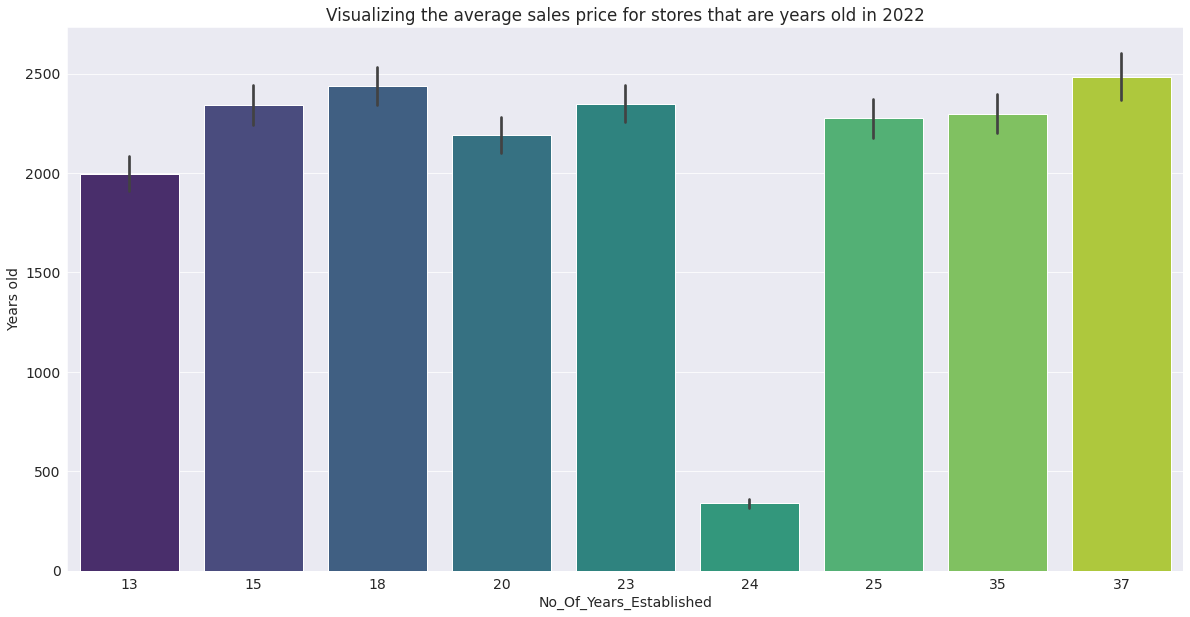

In [888]:
# plotting bargraph of our new extracted column with respect to Item_Outlet_Sales
sns.barplot(x='No_Of_Years_Established',y='Item_Outlet_Sales',data=df ,palette='viridis').set(title = 'Visualizing the average sales price for stores that are years old in 2022')
plt.ylabel('Years old');

We can clearly see that the oldest established store has the highest average sales price for items. This is probably because, in general, people trust brands or stores that have been around for some time.

#### 3.2.2 Feature Selection

In this step, I will be selecting features that are best useful while training our model. I will make use of Pearson correlation coefficient to select best features.

Let us consider two features A and B. Let T be target. Feature A is strongly positively correlated with feature B. This means, when A rises, B also consistently rises. Let us consider that feature A is strongly negatively correlated with the target T, and the feature B is also be strongly negatively correlated with the target T. In this case, it is best if we drop one of the two columns because they have same characteristics with each other as well as with target. In this case, these two columns are identical and may act similar to duplicates. So, it will be best if we drop one of the columns.

I will drop the column that is less strongly correlated with target than the other column.

In [889]:
# rearranging the target column to the end of the dataframe
target = df['Item_Outlet_Sales']
df.drop('Item_Outlet_Sales', axis = 1, inplace = True);df['Item_Outlet_Sales'] = target
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,No_Of_Years_Established,Item_Outlet_Sales
0,1,9.300,0,0.016047,4,249.8092,9,1,0,1,23,3735.1380
1,0,5.920,1,0.019278,14,48.2692,3,1,2,2,13,443.4228
2,1,17.500,0,0.016760,10,141.6180,9,1,0,1,23,2097.2700
3,1,19.200,1,0.053931,6,182.0950,0,1,2,0,24,732.3800
4,2,8.930,0,0.053931,9,53.8614,1,0,2,1,35,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1,6.865,0,0.056783,13,214.5218,1,0,2,1,35,2778.3834
8519,1,8.380,1,0.046982,0,108.1570,7,1,1,1,20,549.2850
8520,2,10.600,0,0.035186,8,85.1224,6,2,1,1,18,1193.1136
8521,1,7.210,1,0.145221,13,103.1332,3,1,2,2,13,1845.5976


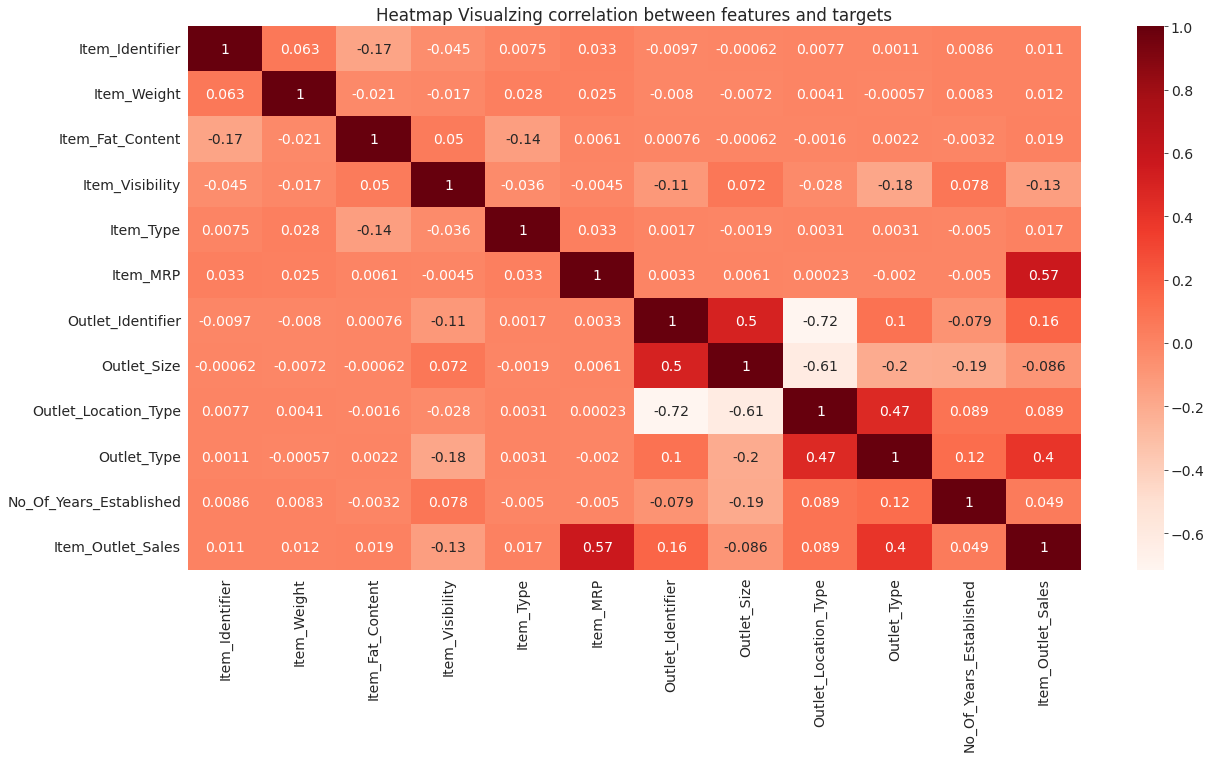

In [890]:
sns.heatmap(df.corr(),cmap='Reds', annot=True).set(title ='Heatmap Visualzing correlation between features and targets');

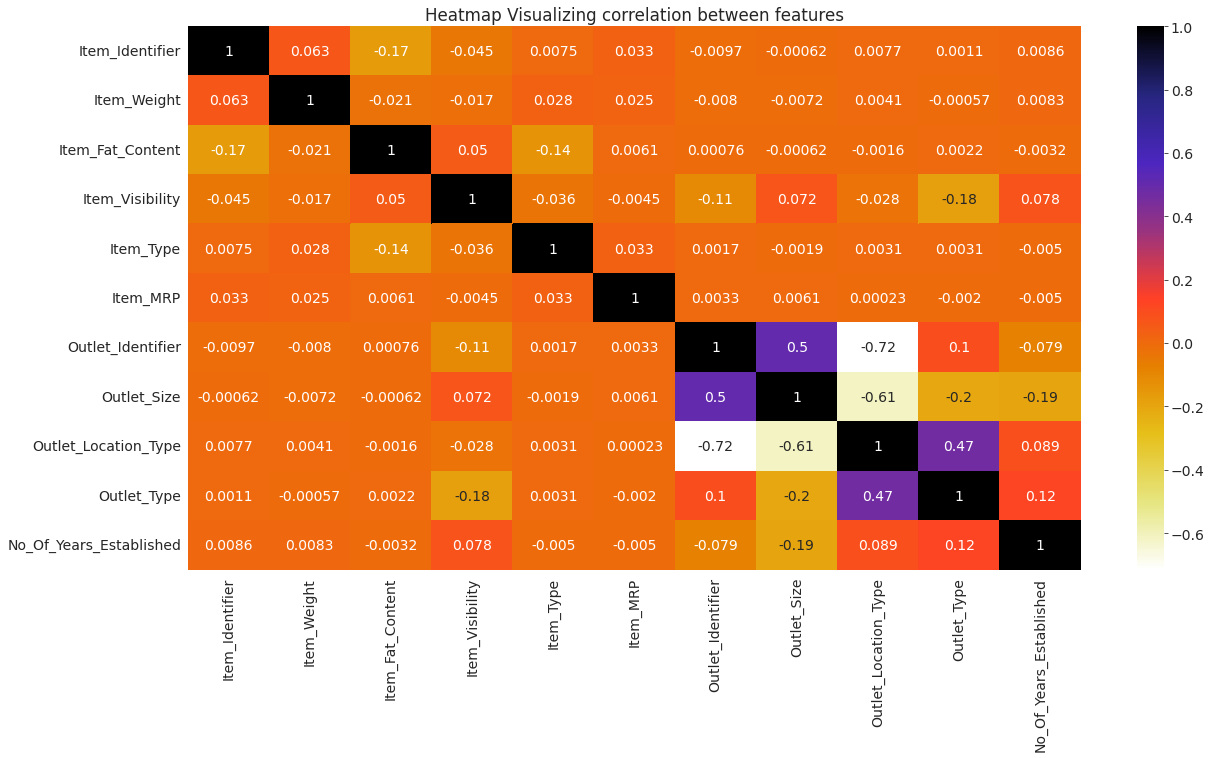

In [891]:
sns.heatmap(df[df.columns.to_list()[:-1]].corr(), annot=True, cmap=plt.cm.CMRmap_r).set(title = 'Heatmap Visualizing correlation between features');

In [892]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, pos_threshold, neg_threshold):
    data = {}
    corr_matrix = df[df.columns.to_list()[:-1]].corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (((corr_matrix.iloc[i, j]) > pos_threshold) or (((corr_matrix.iloc[i, j]) < neg_threshold))): 
                a = []  
                col_i = corr_matrix.columns[i]  
                col_j = corr_matrix.columns[j]
                
                a.append(col_i)
                a.append(col_j)

                data[round(corr_matrix.iloc[i, j], 3)] = a
    return data

In [893]:
data = correlation(df, 0.45, -0.6)
data

{-0.716: ['Outlet_Location_Type', 'Outlet_Identifier'],
 -0.614: ['Outlet_Location_Type', 'Outlet_Size'],
 0.467: ['Outlet_Type', 'Outlet_Location_Type'],
 0.505: ['Outlet_Size', 'Outlet_Identifier']}

I will be taking the threshold for correlation coefficient to be absolute value of (+- 0.7). In this case, two features `Outlet_Location_Type` and `Outlet_Identifier` meet the threshold. The column `Outlet_Location_Type` has the Pearson correlation coefficient 0.089 with target. Similarly, the feature `Outlet_Identifier` has the Pearson correlation coefficient 0.16 with the target. 

Hence, I will be dropping the column `Outlet_Location_Type`.

In [894]:
#dropping the column Outlet_Location_Type

df.drop('Outlet_Location_Type', axis = 1, inplace = True)

<b> Scaling the Features using StandardScaler Class from Scikit-Learn </b>

Our ML models work with numbers. Inside our ML models, numbers are getting added, subtracted, multiplied etc. So, in the features, if there is a vast difference in the range of values, the model tends to make an assumption that the bigger number are more impactful than the smaller numbers. So, this hinders the ability of model as bigger numbers will play more role than smaller numbers.

Hence, before feeding the data to model, it is very important for us to scaler the features such that they all come in same range.

For scaling the features, I will be using StandardScaler class from scikit-learn. What StandardScaler does is that, it subtracts every value in features by the column's mean and then, divides by the standard deviation

```
For a sample x, the scaled value using StandardScaler would be 
  
  scaled(let) = (x - u) / sd

  where, u is the mean and sd is standard deviation
```

In [895]:
# scaling the features using StandardScaler

# instantiating the object for StandardScaler class
scaler = StandardScaler().fit(df[df.columns.to_list()[:-1]])

In [896]:
# We will only be scaling our features not target
df[df.columns.to_list()[:-1]] = scaler.transform(df[df.columns.to_list()[:-1]])

In [897]:
# the calculated mean for corresponding columns
scaler.mean_

array([1.09386366e+00, 1.28576452e+01, 3.52692714e-01, 6.94603957e-02,
       7.22668075e+00, 1.40992782e+02, 4.72228089e+00, 1.17083187e+00,
       1.20122023e+00, 2.41681333e+01])

In [898]:
# the calculated variance for corresponding columns
scaler.var_

array([2.72545943e-01, 1.78580262e+01, 2.28300563e-01, 2.39022349e-03,
       1.77219351e+01, 3.87772888e+03, 8.04876673e+00, 3.60350675e-01,
       6.34272828e-01, 7.00781491e+01])

In [899]:
# the names of the features that have been scaled
scaler.feature_names_in_

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Type', 'No_Of_Years_Established'],
      dtype=object)

<b> Lets look at our final preprocessed dataframe </b>

In [900]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,No_Of_Years_Established,Item_Outlet_Sales
0,-0.179795,-0.841872,-0.738147,-1.092518,-0.766479,1.747454,1.507813,-0.284581,-0.252658,-0.139541,3735.1380
1,-2.095286,-1.641706,1.354743,-1.026432,1.608963,-1.489023,-0.607071,-0.284581,1.002972,-1.334103,443.4228
2,-0.179795,1.098554,-0.738147,-1.077939,0.658786,0.010040,1.507813,-0.284581,-0.252658,-0.139541,2097.2700
3,-0.179795,1.500838,1.354743,-0.317641,-0.291391,0.660050,-1.664513,-0.284581,-1.508289,-0.020085,732.3800
4,1.735696,-0.929428,-0.738147,-0.317641,0.421242,-1.399220,-1.312032,-1.950437,-0.252658,1.293934,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,-0.179795,-1.418084,-0.738147,-0.259297,1.371418,1.180783,-1.312032,-1.950437,-0.252658,1.293934,2778.3834
8519,-0.179795,-1.059578,1.354743,-0.459767,-1.716656,-0.527301,0.802852,-0.284581,-0.252658,-0.497909,549.2850
8520,1.735696,-0.534243,-0.738147,-0.701047,0.183698,-0.897208,0.450371,1.381274,-0.252658,-0.736822,1193.1136
8521,-0.179795,-1.336444,1.354743,1.549609,1.371418,-0.607977,-0.607071,-0.284581,1.002972,-1.334103,1845.5976


## 4. Linear Regression Model using Scikit-Learn

<b> Linear Regression and Gradient Descent

`Linear Regression` is a supervised machine learning model that finds the line of best fit betweem the features and target. There are mainly two types of Linear Regression. They are:

  1. Univariate Linear Regression
  
  2. Multivariate Linear Regression
  
A Multivariate Linear Regression is a type of Linear Regression Model that is used when there are at least 2 feature columns. Similarly, a Univariate Linear Regression is used to establish the line of best fit between a feature and target.

I will be applying Multivariate Linear Regression as there are multiple number of features in my data.
```
Let us consider a dataset with features f1,f2,f3,f4,and f5 and a target t. The equation of line that a Linear Regression Model can developed can be given as:

  y = (w1 * f1) + (w2 * f2) + (w3 * f3) + (w4 * f4) + (w5 * f5) + c,

  where, y = prediction
  
  w1,w2,w3,w4 and w5 are the weights of features f1,f2,f3,f4, and f5 respectively.

  Similarly, c is the intercept or bias.
```

  The main aim of a Linear Regression Model is to find the line of best fit like the one above in such a way that the loss/cost function is minimum. For this, the optimal values of weights and bias need to be calculated.

Initially, weights and bias are initialized at random. Then, the training loop is run for a number of iterations called `Epochs`. Then, in every `epoch`, the weights and bias are updated as:

    weights = weights - learning_rate * derivative of loss with respect to weights

    bias = bias - learning_rate * derivative of loss with respect to bias

Here, the most popular optimization algorithm `Gradient Descent` is utilized. When weights and biases are initially initialized at random, the original loss will be very high. Then, we descend along the loss with respect to the learning rate such that after every `epochs`, our weights and bias get updated and loss ultimately reduces. This process is executed until our loss gets close to the global minima. 

In this way, Linear Regression along with Gradient Descent can be used to get the optimal equation of line of best fit and reduce the loss function and make optimal predictions.

I will be applying the Linear Regression for this dataset using Scikit-Learn library.





### 4.1 Creating Training, Validation and Testing Sets


I will make use of train_test_split class from sklearn to divide our original dataset into 3 parts: Training set, Validation set, and Testing set.
```
Training Set will be used to train the model

Validation Set will be used to analyze models performance while performing `Hyperparameter Tuning`

Testing Set will be used to measure final performance of our model
```

In [901]:
# creating our feature matrix
X = df[df.columns.to_list()[:-1]]

# creating our response vector
y = df['Item_Outlet_Sales']

In [902]:
# printing the first five rows of our feature matrix
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,No_Of_Years_Established
0,-0.179795,-0.841872,-0.738147,-1.092518,-0.766479,1.747454,1.507813,-0.284581,-0.252658,-0.139541
1,-2.095286,-1.641706,1.354743,-1.026432,1.608963,-1.489023,-0.607071,-0.284581,1.002972,-1.334103
2,-0.179795,1.098554,-0.738147,-1.077939,0.658786,0.010040,1.507813,-0.284581,-0.252658,-0.139541
3,-0.179795,1.500838,1.354743,-0.317641,-0.291391,0.660050,-1.664513,-0.284581,-1.508289,-0.020085
4,1.735696,-0.929428,-0.738147,-0.317641,0.421242,-1.399220,-1.312032,-1.950437,-0.252658,1.293934


In [903]:
# printing the last five rows of our response vector
y.tail()

8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, dtype: float64

In [904]:
# creating training and testing set

# here, random_state = 42 makes sure that everytime we run this, we get the same split
# test_size = 0/15 makes sure our training set will have 85 % data and testing will have 15 % respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.15)  

In [905]:
# printing the shapes of X_train and y_train
print(X_train.shape)   
print(y_train.shape)

(7244, 10)
(7244,)


In [906]:
# printing the shapes of X_test and y_test
print(X_test.shape)
print(y_test.shape)

(1279, 10)
(1279,)


In [907]:
# creating training and validation set by randomly splitting training set
X_train,X_val,y_train,y_val = train_test_split(X_train, y_train, random_state = 42, test_size = 0.15)

In [908]:
# printing the shapes of X_train and y_train
print(X_train.shape)
print(y_train.shape)

(6157, 10)
(6157,)


In [909]:
# printing the shapes of X_val and y_val
print(X_val.shape)
print(y_val.shape)

(1087, 10)
(1087,)


### 4.2 Making Predictions and Calculating Loss Function

In [910]:
# Creating the object for the LinearRegression class with all hyperparameters set to default
lin_reg = LinearRegression()

In [911]:
# fit method takes in a feature matrix and a response vector
# this method is used to train our model and find optimal values of weights and bias
lin_reg.fit(X_train,y_train)

LinearRegression()

In [912]:
# this returns the coefficients or weights of corresponding columns
lin_reg.coef_

array([  -7.55464002,   -4.45779606,   31.80974167,  -78.1818134 ,
          4.66461712,  965.70962394,  296.01561947, -172.5166322 ,
        604.72973496,   12.78688068])

In [913]:
# this returns the intercept or bias
lin_reg.intercept_

2178.2580966339565

In [914]:
# this returns true if we have used intercept/bias for calculation
lin_reg.fit_intercept

True

In [915]:
# getting our feature columns from training set
feature_cols = X_train.columns.to_list();feature_cols

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Type',
 'No_Of_Years_Established']

In [916]:
#pairing the feature names with coefficients
zipped = list(zip(feature_cols, lin_reg.coef_)) 
print(zipped)

[('Item_Identifier', -7.554640019018193), ('Item_Weight', -4.457796056606213), ('Item_Fat_Content', 31.809741671829244), ('Item_Visibility', -78.1818134044), ('Item_Type', 4.664617123686854), ('Item_MRP', 965.7096239379241), ('Outlet_Identifier', 296.01561947016194), ('Outlet_Size', -172.51663219628887), ('Outlet_Type', 604.7297349591031), ('No_Of_Years_Established', 12.786880680348325)]


In [917]:
equation = ""

for i in zipped:
  equation += '( ' + i[0] + ' * ' + str(round(i[1],2)) +' )'+' '

equation += ' + '+ '( '+str(round(lin_reg.intercept_,2))+' )'

print("The equation is: \n")
print('y(target) = '+equation)

The equation is: 

y(target) = ( Item_Identifier * -7.55 ) ( Item_Weight * -4.46 ) ( Item_Fat_Content * 31.81 ) ( Item_Visibility * -78.18 ) ( Item_Type * 4.66 ) ( Item_MRP * 965.71 ) ( Outlet_Identifier * 296.02 ) ( Outlet_Size * -172.52 ) ( Outlet_Type * 604.73 ) ( No_Of_Years_Established * 12.79 )  + ( 2178.26 )


In [918]:
# lets create a new dataframe containing the weights and bias for our model
weights_and_intercept = pd.DataFrame({
    'Features':np.append(feature_cols, 'Intercept'),
    'Weight':np.append(lin_reg.coef_, lin_reg.intercept_)
});weights_and_intercept

,Features,Weight
0,Item_Identifier,-7.554640
1,Item_Weight,-4.457796
2,Item_Fat_Content,31.809742
3,Item_Visibility,-78.181813
4,Item_Type,4.664617
5,Item_MRP,965.709624
6,Outlet_Identifier,296.015619
7,Outlet_Size,-172.516632
8,Outlet_Type,604.729735
9,No_Of_Years_Established,12.786881


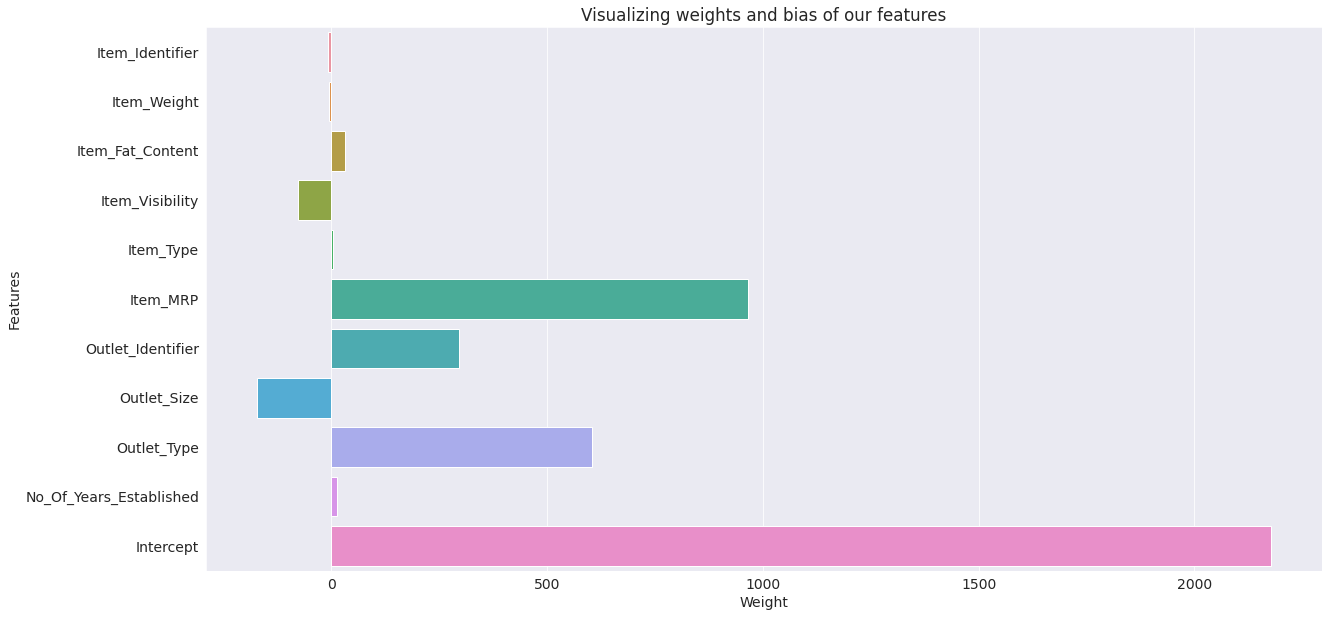

In [919]:
sns.barplot(x = 'Weight', y = 'Features', data = weights_and_intercept).set(title = 'Visualizing weights and bias of our features');

Apart from the intecept ,we can clearly see that the feature `Item_MRP` has the highest influence on our model. This clearly makes sense as higher is the MRP of an item, higher will be its selling price.

Lets make predictions on training and validation set and measure our loss.

In [920]:
# Making predictions on training data
train_preds = lin_reg.predict(X_train)

In [921]:
# making predictions on validation set
val_preds = lin_reg.predict(X_val)

Most popular Evaluation Metrics for Linear Regression

1. Mean Absolute Error(MAE)

  - MAE is calculated by taking the absolute difference between the predicted and actual values and finally dividing by total rows present in the dataset. 
  

2. Mean Squared Error(MSE)

  - MSE is calculated by squaring the difference between the predicted and actual values and finally dividing by total rows present in the dataset. 

3. Root Mean Squared Error (RMSE)

  - RMSE is calculated by taking the square root of MSE. It is also known as Root Mean Square Deviation

4. R-Squared
  - R-squared is a goodness-of-fit measure for linear regression model. 

```
R^2 = (Variance explained by the model) / Total variance

```

I will mainly be using `RMSE` to evaluate the loss function and performance of our linear regression model.

In [922]:
# RMSE on the training set
np.sqrt(mean_squared_error(y_train, train_preds)) # RMSE

1209.307533522265

```
RMSE can also be calculated as:

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

```

The RMSE on training predictions is calculated to be 1209.3075. This means, for all of our training data, our predictions are off by approximately $ 1210 from the actual prices. The RMSE calculated is from the training data. This is never a good indicator of model's actual performance because the model has already been trained on training data and we are making predictions on the training data.

In real life, our model will certainly see data that it has not seen before or has not been trained on. Therefore, we will evaluate our model's performance using validation set while performing hyperparameter tuning. I will also use testing set at the end to evalutate our optimized models performance.

I have created training, validation, and testing set using train_test_split() class from scikit-learn.

In [923]:
print("RMSE for training set: ",np.sqrt(mean_squared_error(y_train, train_preds)))

RMSE for training set:  1209.307533522265


In [924]:
print("RMSE for validation set: ",np.sqrt(mean_squared_error(y_val, val_preds)))

RMSE for validation set:  1183.1647398612229


The performance of our model on training and validation set is almost identical. Our model has not been trained with validation set. This also indicates that our model has not `overfitted` with training data.

The RMSE on validation predictions is calculated to be approximately 1183. This means, for all of our validation data, our predictions are off by approximately $ 1183 from the actual prices.

This is a very good performance from our model. Perhaps, this is because we preprocessed our data well and selected proper features.

In [925]:
print("Mean Absolute Error for training set: ",mean_absolute_error(y_train, train_preds))
print("Mean Absolute Error for validation set: ",mean_absolute_error(y_val, lin_reg.predict(X_val)))

Mean Absolute Error for training set:  912.8618167347356
Mean Absolute Error for validation set:  886.781322746016


<b> The reason RMSE is more favourable than MAE is because RMSE penalizes outliers whereas MAE doesnot </b>

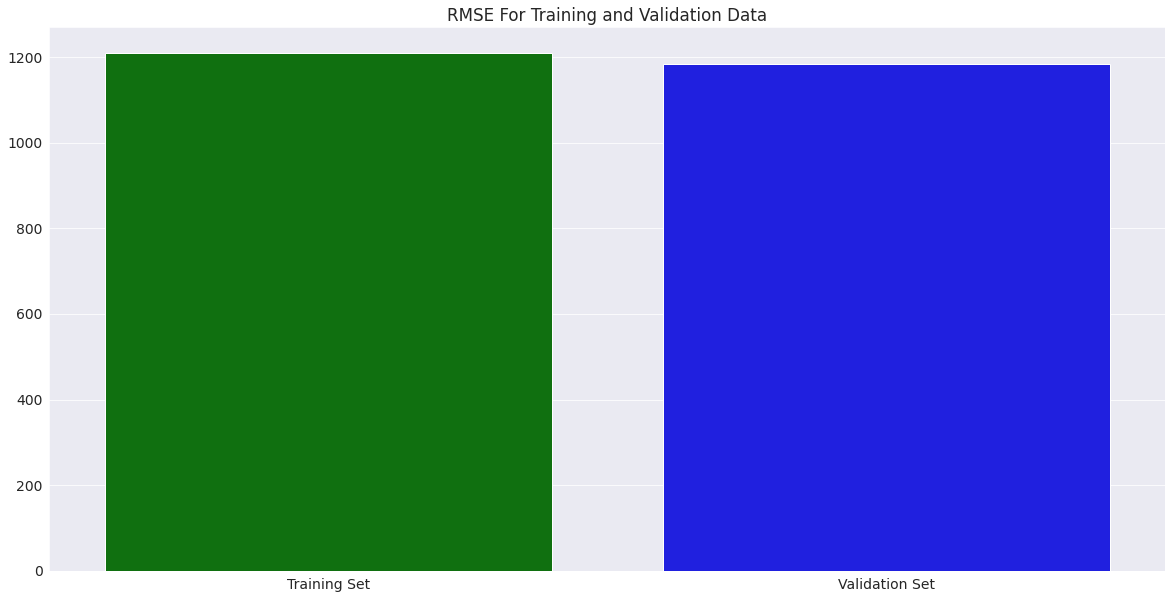

In [926]:
# plotting a barplot to visualize rmse for training and validation predictions
sns.barplot(y = [np.sqrt(mean_squared_error(y_train, train_preds)), np.sqrt(mean_squared_error(y_val, val_preds))], x = ['Training Set','Validation Set'], palette = ['green','blue']).set(title = 'RMSE For Training and Validation Data');

We can clearly see that the training rmse is slightly larger than validation rmse.

<b> I have used the default linear regression model offered by Scikit-Learn. I will now tweak the Hyperparameters of this model to see if there is any increase in performance. </b>

### 4.3 Hyperparameter Tuning 

Hyperparameters simply refers to the parameters of a model that control the learning process and directly affect the descision making of a machine learning model.

The following Hyperparameters will be tuned:

  1. positive
  
  - This Hyperparameter takes in a boolean value(True/False). If positive is
  
   passed as True, our linear regression model will be forced to make all 
   
   coefficients/weights to be positive. By default, it is set to False. We will 
   
   also check our model's loss function by making it True.

  2. fit_intercept

  - This Hyperparameter also takes in a boolean value(True/False). If 
  
  fit_intercept is set to False, our linear regression model will not compute 
  
  calculation using bias/intercept. By default, it is set to True. We will also
  
   evaluate our model's loss function by making it False.


<b> Tuning Hyperparameter positive

In [927]:
# our default model
lin_reg = LinearRegression(n_jobs = -1, positive = False).fit(X_train,y_train)

# calculating rmse on training data
default_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

# calculating rmse on valdiation data
default_val_rmse = np.sqrt(mean_squared_error(y_val, lin_reg.predict(X_val)))

In [928]:
# hyperparameter positive tuned model
lin_reg = LinearRegression(n_jobs = -1, positive = True).fit(X_train,y_train)

# calculating rmse on training data
new_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

# calculating rmse on valdiation data
new_val_rmse = np.sqrt(mean_squared_error(y_val, lin_reg.predict(X_val)))

In [929]:
# creating a dataframe to store training and valdiation rmse for old and new model
practise_df = pd.DataFrame({
    'Models':['default_train_rmse','new_train_rmse','default_val_rmse','new_val_rmse'],
    'rmse':[default_train_rmse, new_train_rmse, default_val_rmse, new_val_rmse]
});practise_df

,Models,rmse
0,default_train_rmse,1209.307534
1,new_train_rmse,1209.307534
2,default_val_rmse,1183.164740
3,new_val_rmse,1197.935904


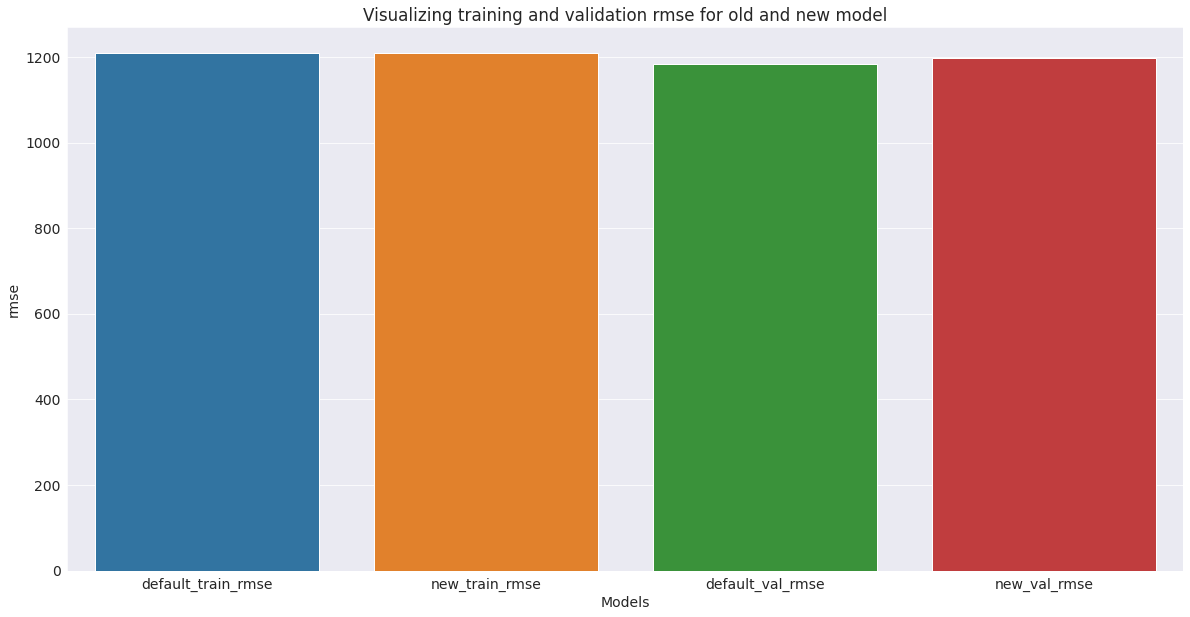

In [930]:
sns.barplot(data = practise_df, x = 'Models',y = 'rmse').set(title = 'Visualizing training and validation rmse for old and new model');

it looks like our model performed better with positive hyperparameter set to default. So, we are going to tune our model that way.

In [931]:
# our default model

# n_jobs parameter doesnot affect our models performance. This is simply the number of cores to use for performing model training
# for particularly large dataset, it can speed up training. when n_jobs is set to -1, it will result in usage of all available cores
lin_reg = LinearRegression(n_jobs = -1, positive = False).fit(X_train,y_train)

<b> Tuning fit_intercept hyperparameter

In [932]:
# our default model
lin_reg = LinearRegression(n_jobs = -1, positive = False, fit_intercept = True).fit(X_train,y_train)

# calculating rmse on training data
default_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

# calculating rmse on valdiation data
default_val_rmse = np.sqrt(mean_squared_error(y_val, lin_reg.predict(X_val)))

In [933]:
# hyperparameter fit_intercept tuned model
lin_reg = LinearRegression(n_jobs = -1, positive = False, fit_intercept = False).fit(X_train,y_train)

# calculating rmse on training data
new_train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))

# calculating rmse on valdiation data
new_val_rmse = np.sqrt(mean_squared_error(y_val, lin_reg.predict(X_val)))

In [934]:
practise_df = pd.DataFrame({
    'Models':['default_train_rmse','new_train_rmse','default_val_rmse','new_val_rmse'],
    'rmse':[default_train_rmse, new_train_rmse, default_val_rmse, new_val_rmse]
});practise_df

,Models,rmse
0,default_train_rmse,1209.307534
1,new_train_rmse,1209.307534
2,default_val_rmse,1183.164740
3,new_val_rmse,2490.815840


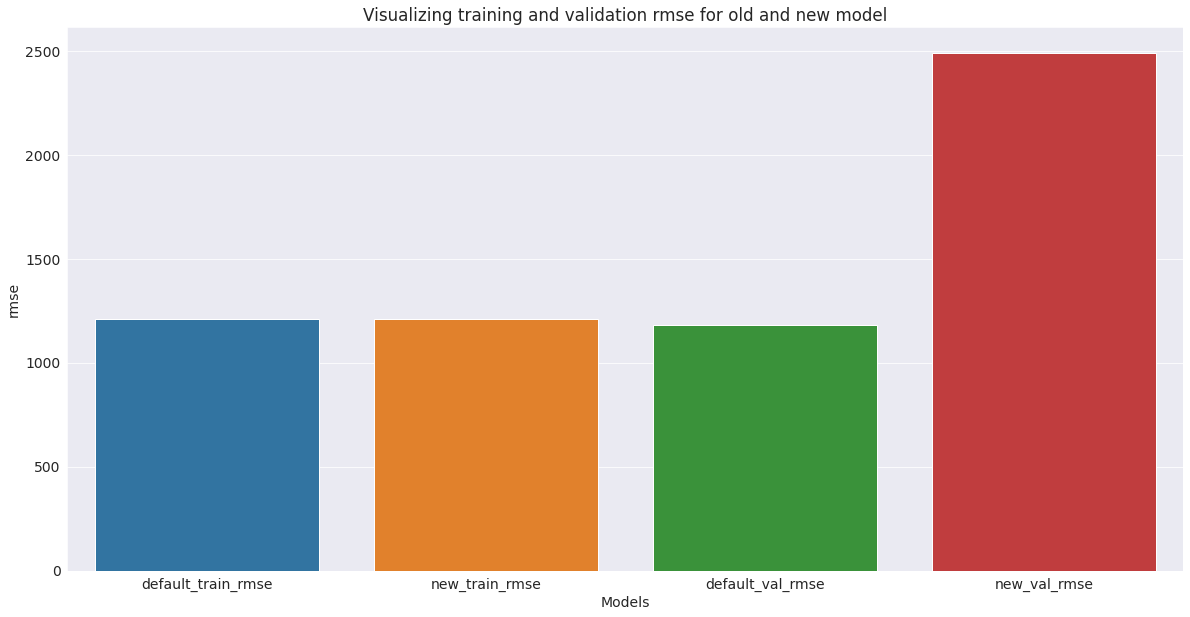

In [935]:
sns.barplot(data = practise_df, x = 'Models',y = 'rmse').set(title = 'Visualizing training and validation rmse for old and new model');

It looks like our default model was best regardless. So, we will tune our model that way.

In [936]:
# our default model
lin_reg = LinearRegression(n_jobs = -1, positive = False, fit_intercept = True).fit(X_train,y_train)

Making Final Prediction on Testing data

In [937]:
# final rmse for training set
final_training_rmse = np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train)))

In [938]:
# final rmse for validation set
final_validation_rmse = np.sqrt(mean_squared_error(y_val, lin_reg.predict(X_val)))

In [939]:
# final rmse for testing set
final_testing_rmse = np.sqrt(mean_squared_error(y_test, lin_reg.predict(X_test)))

In [940]:
# final r2_score on testing set
final_r2_score  = r2_score(y_test, lin_reg.predict(X_test))

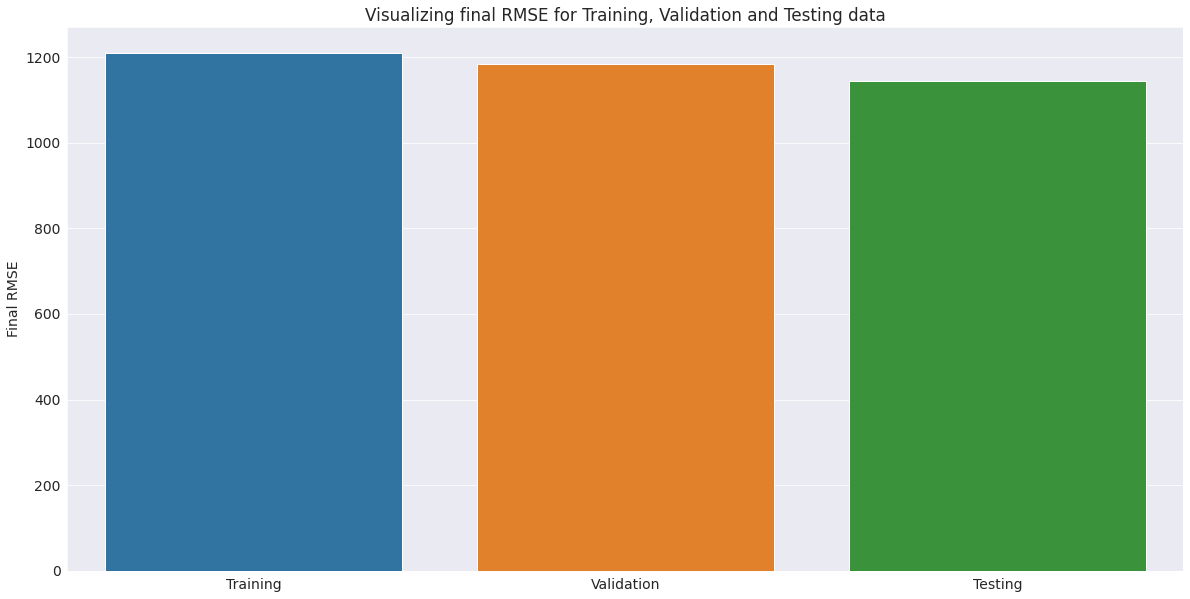

In [941]:
sns.barplot(x = ['Training', 'Validation', 'Testing'], y = [final_training_rmse, final_validation_rmse, final_testing_rmse]).set(title = 'Visualizing final RMSE for Training, Validation and Testing data')
plt.ylabel("Final RMSE");

Our model has a very low rmse loss on all training, validation and testing data. Furthermore, Our model's performance is also identical accross training, validation, and testing set. This also indicates, our model has not overfitted while training. 

Lets also visualize the weights and bias of our model.

In [942]:
print("The final RMSE on Testing set is: ", final_testing_rmse)
print("The final r2_score on Testing set is: ",final_r2_score)

The final RMSE on Testing set is:  1143.6616228572348
The final r2_score on Testing set is:  0.5351045040252771


The RMSE on testing set is approximately $ 1144 .

This means that my linear regression model is off by $ 1144 while making predictions on the entire testing.

<b> Visualizing weights and bias of our Linear Regression Model </b>

In [943]:
weights_and_bias = pd.DataFrame({
    'weight': np.append(lin_reg.coef_, lin_reg.intercept_),
    'feature': np.append(X_train.columns.to_list(), 'Intercept/Bias'),
})
weights_and_bias.sort_values('weight', ascending=False, inplace = True);weights_and_bias

,weight,feature
10,2178.258097,Intercept/Bias
5,965.709624,Item_MRP
8,604.729735,Outlet_Type
6,296.015619,Outlet_Identifier
2,31.809742,Item_Fat_Content
9,12.786881,No_Of_Years_Established
4,4.664617,Item_Type
1,-4.457796,Item_Weight
0,-7.554640,Item_Identifier
3,-78.181813,Item_Visibility


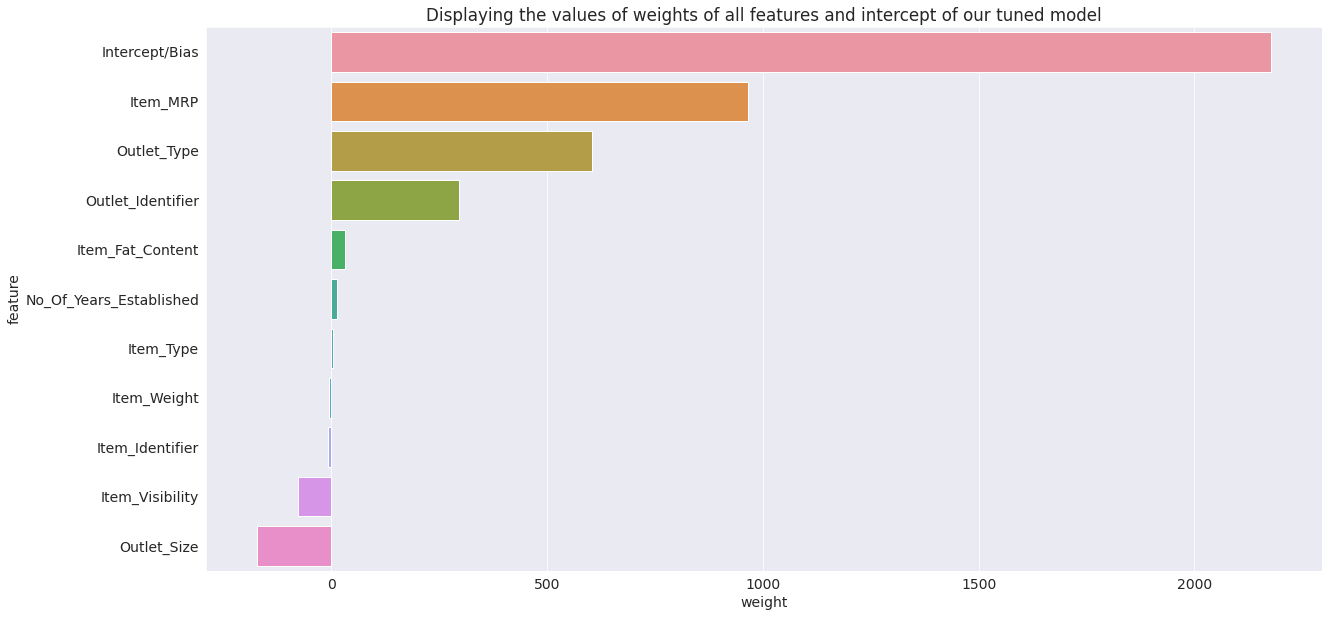

In [944]:
sns.barplot(x = 'weight',y = 'feature', data = weights_and_bias).set(title = 'Displaying the values of weights of all features and intercept of our tuned model');

The intercept has the highest value that is about 2300. Apart from the intercept, the `Item_MRP` has the most affect on the model. It is so because, higher the MRP, higher will be the sales price of that item in the store.

### Making individual Predictions

In [945]:
# creating a new testing dataframe
individual_df = pd.DataFrame({
    'Item_Identifier':['Food'],
    'Item_Weight':[10.],
    'Item_Fat_Content':['Low Fat'],
    'Item_Visibility':[0.016],
    'Item_Type':['Meat'],
    'Item_MRP':[100.0],
    'Outlet_Identifier':['OUT049'],
    'Outlet_Size':['Medium'],
    'Outlet_Type':['Supermarket Type 1'],
    'No_Of_Years_Established':[30]
});individual_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,No_Of_Years_Established
0,Food,10.0,Low Fat,0.016,Meat,100.0,OUT049,Medium,Supermarket Type 1,30


In [946]:
final_categorical_cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Type']

In [948]:
# encoding categorical columns
for i in final_categorical_cols:
  individual_df[i] = encoder.fit_transform(individual_df[i])

In [949]:
# getting all columns
all_columns = individual_df.columns.to_list();all_columns

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Type',
 'No_Of_Years_Established']

In [950]:
# scaling the new dataframe with the same scaler that we previously used
individual_df = scaler.transform(individual_df)

In [951]:
individual_df = pd.DataFrame(individual_df,columns = all_columns);individual_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,No_Of_Years_Established
0,-2.095286,-0.676226,-0.738147,-1.093485,-1.716656,-0.658292,-1.664513,-1.950437,-1.508289,0.696653


In [956]:
# making predictions on trained linear regression model
print("The Estimated Sales Price for this Item is: $",round(lin_reg.predict(individual_df)[0], 3))

The Estimated Sales Price for this Item is: $ 555.947


```
Hence, an item that:

  1. that belongs to food category,
  2. has low fat content,
  3. has item visibility of 0.016 %,
  4. is of type meat,
  5. has MRP 100.0,
  6. is of medium size,
  7. is from a supermarket type 1,
  8. and is from a store that was established 30 years ago

 would cost roughly $ 556.
 ```

# Name: Sujan Neupane
#  BIT GROUP 2
#  UNI ID: 2058939